# Environment Setup

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from itertools import repeat


# Data Loading

In [2]:
_df = pd.read_csv("./input/dummy_df.csv", index_col=0)
_df

year  artist.inverted                     track  time date.entered  \
0     2000  Destiny's Child  Independent Women Part I  3:38   2000-09-23   
317   2000  Destiny's Child  Independent Women Part I  3:38   2000-09-23   
634   2000  Destiny's Child  Independent Women Part I  3:38   2000-09-23   
951   2000  Destiny's Child  Independent Women Part I  3:38   2000-09-23   
1268  2000  Destiny's Child  Independent Women Part I  3:38   2000-09-23   
...    ...              ...                       ...   ...          ...   
314   2000    Zombie Nation             Kernkraft 400  3:30   2000-09-02   
631   2000    Zombie Nation             Kernkraft 400  3:30   2000-09-02   
315   2000    The Eastsidaz                  Got Beef  3:58   2000-07-01   
632   2000    The Eastsidaz                  Got Beef  3:58   2000-07-01   
316   2000           Fragma            Toca's Miracle  3:22   2000-10-28   

     date.peaked  week  rank  gap_week  total_time_s  ...  \
0     2000-11-18     1    78     False           218  ...   
317   2000-11-18     2    63     False           218  ...   
634   2000-11-18     3    49     False           218  ...   
951   2000-11-18     4    33     False           218  ...   
1268  2000-11-18     5    23     False           218  ...   
...          ...   ...   ...       ...           ...  ...   
314   2000-09-02     1    99     False           210  ...   
631   2000-09-02     2    99     False           210  ...   
315   2000-07-01     1    99     False           238  ...   
632   2000-07-01     2    99     False           238  ...   
316   2000-10-28     1    99     False           202  ...   

      date.peaked.quarter  genre_Electronica  genre_Gospel  genre_Jazz  \
0                       4                  0             0           0   
317                     4                  0             0           0   
634                     4                  0             0           0   
951                     4                  0             0           0   
1268                    4                  0             0           0   
...                   ...                ...           ...         ...   
314                     3                  0             0           0   
631                     3                  0             0           0   
315                     3                  0             0           0   
632                     3                  0             0           0   
316                     4                  0             0           0   

      genre_Latin  genre_Pop  genre_R&B  genre_Rap  genre_Reggae  genre_Rock  
0               0          0          0          0             0           1  
317             0          0          0          0             0           1  
634             0          0          0          0             0           1  
951             0          0          0          0             0           1  
1268            0          0          0          0             0           1  
...           ...        ...        ...        ...           ...         ...  
314             0          0          0          0             0           1  
631             0          0          0          0             0           1  
315             0          0          0          1             0           0  
632             0          0          0          1             0           0  
316             0          0          1          0             0           0  

[5308 rows x 27 columns]

In [3]:
_df.columns

Index(['year', 'artist.inverted', 'track', 'time', 'date.entered',
       'date.peaked', 'week', 'rank', 'gap_week', 'total_time_s',
       'date.entered.year', 'date.entered.month', 'date.entered.day',
       'date.entered.quarter', 'date.peaked.year', 'date.peaked.month',
       'date.peaked.day', 'date.peaked.quarter', 'genre_Electronica',
       'genre_Gospel', 'genre_Jazz', 'genre_Latin', 'genre_Pop', 'genre_R&B',
       'genre_Rap', 'genre_Reggae', 'genre_Rock'],
      dtype='object')

# Supervised Learning - Linear Regression

## Outliers

In [4]:
reg_df = _df[['total_time_s', 'rank']]
reg_df

total_time_s  rank
0              218    78
317            218    63
634            218    49
951            218    33
1268           218    23
...            ...   ...
314            210    99
631            210    99
315            238    99
632            238    99
316            202    99

[5308 rows x 2 columns]

<Axes: >

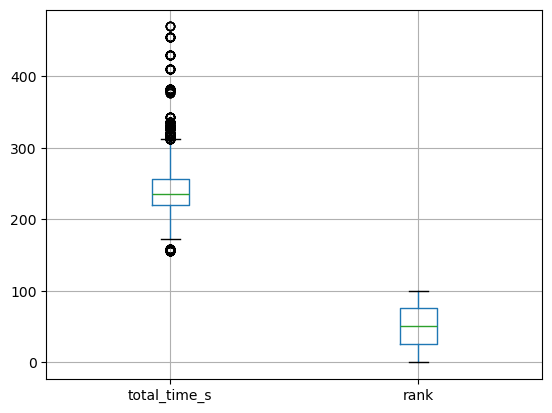

In [5]:
reg_df.boxplot()

In [6]:
_25p = reg_df['total_time_s'].quantile(.25)
_75p = reg_df['total_time_s'].quantile(.75)
_iqr = _75p - _25p
_out_range = 1.5 * _iqr

In [7]:
print( _25p, _75p, _iqr, _out_range)

220.0 257.0 37.0 55.5


In [8]:
_bottom_limit = _25p - _out_range
_top_limit = _75p + _out_range
print (_bottom_limit, _top_limit)

164.5 312.5


In [9]:
out_reg_df = reg_df[(reg_df['total_time_s']<=_top_limit) & (reg_df['total_time_s']>=_bottom_limit)]

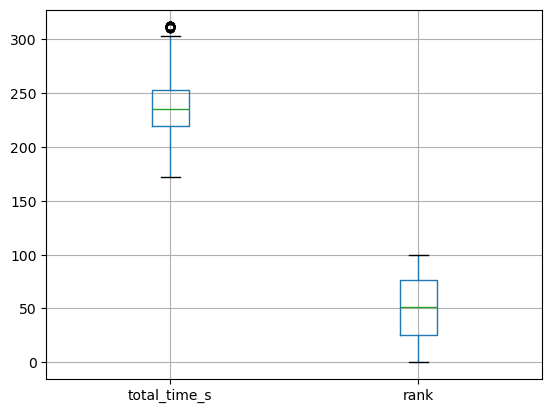

In [10]:
out_reg_df.boxplot()
plt.show()

## Features and Target Split

In [11]:
X = out_reg_df.drop(columns=['rank'])
y = out_reg_df[['rank']]

## Scaling

### Features

In [12]:
from sklearn.preprocessing import StandardScaler

features_standard_scaler = StandardScaler().fit(X).set_output(transform='pandas')
features_scale_df = features_standard_scaler.transform(X)
features_scale_df

total_time_s
0        -0.644739
317      -0.644739
634      -0.644739
951      -0.644739
1268     -0.644739
...            ...
314      -0.941175
631      -0.941175
315       0.096351
632       0.096351
316      -1.237611

[4948 rows x 1 columns]

### Target

In [13]:
target_standard_scaler = StandardScaler().fit(y).set_output(transform='pandas')
target_scale_df = target_standard_scaler.transform(y)
target_scale_df

rank
0     0.932877
317   0.421702
634  -0.055395
951  -0.600648
1268 -0.941431
...        ...
314   1.648522
631   1.648522
315   1.648522
632   1.648522
316   1.648522

[4948 rows x 1 columns]

## Train-Test-Split

In [14]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(features_scale_df, target_scale_df, train_size=0.8, test_size=0.2)

In [15]:
X_train

total_time_s
5741      -0.163031
3818       0.281623
3584      -0.051867
6127       0.059296
2552       0.689223
...             ...
13965      0.318678
565       -0.681794
7946      -0.200085
2156      -1.682265
3325       2.504893

[3958 rows x 1 columns]

In [16]:
y_train

rank
5741  -0.941431
3818  -1.520763
3584  -0.600648
6127   0.592094
2552  -0.975510
...         ...
13965 -0.668805
565    1.614444
7946  -0.873275
2156   1.273661
3325  -0.225786

[3958 rows x 1 columns]

In [17]:
X_test

total_time_s
2219     -0.644739
772      -0.051867
549       0.837441
2019      1.282095
853       0.615114
...            ...
851      -1.348775
6359     -0.459467
1166     -0.014813
4529     -0.681794
7315     -0.088922

[990 rows x 1 columns]

In [18]:
y_test

rank
2219 -1.554841
772   0.864721
549   0.592094
2019 -0.362100
853   0.421702
...        ...
851   1.478131
6359 -1.384450
1166  0.387624
4529 -0.328021
7315 -1.520763

[990 rows x 1 columns]

## Model Execution

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [20]:
_pred = reg.predict(X_test)

In [21]:
_pred

array([[-0.00853812],
       [-0.00945875],
       [-0.01083969],
       [-0.01153016],
       [-0.01049446],
       [-0.00934367],
       [-0.00934367],
       [-0.00888335],
       [-0.00894089],
       [-0.01273849],
       [-0.00658178],
       [-0.00848058],
       [-0.01014922],
       [-0.01153016],
       [-0.01032184],
       [-0.01009168],
       [-0.00922859],
       [-0.00704209],
       [-0.01055199],
       [-0.00819288],
       [-0.00853812],
       [-0.00922859],
       [-0.00888335],
       [-0.01020676],
       [-0.00934367],
       [-0.01078215],
       [-0.00658178],
       [-0.00761749],
       [-0.00899843],
       [-0.01118493],
       [-0.0080778 ],
       [-0.01170278],
       [-0.01049446],
       [-0.00974644],
       [-0.01222064],
       [-0.00986152],
       [-0.00738733],
       [-0.01009168],
       [-0.0115877 ],
       [-0.00865319],
       [-0.01020676],
       [-0.01210556],
       [-0.00894089],
       [-0.01009168],
       [-0.00663932],
       [-0

In [22]:
reg.coef_

array([[-0.00155283]])

In [23]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [24]:
reg.score(X_test, y_test)

-0.002163592534010883

### Performance Checking

In [25]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, _pred)

1.0169005833402265

In [26]:
np.sqrt(mean_squared_error(y_test, _pred))

1.0084148865126032

In [27]:
from sklearn.metrics import r2_score

r2_score(y_test, _pred)

-0.002163592534010883

In [28]:
target_pred_df = target_standard_scaler.inverse_transform(_pred)
target_test_df = target_standard_scaler.inverse_transform(y_test)

In [29]:
target_pred_df.mean()

50.34539832794921

In [30]:
np.sqrt(mean_squared_error(target_pred_df, target_test_df))

29.591082832808823

In [31]:
r2_score(target_pred_df, target_test_df)

-394584.3313589834

# Supervised Learning - Classification: Logistic Regression

In [32]:
_df.columns

Index(['year', 'artist.inverted', 'track', 'time', 'date.entered',
       'date.peaked', 'week', 'rank', 'gap_week', 'total_time_s',
       'date.entered.year', 'date.entered.month', 'date.entered.day',
       'date.entered.quarter', 'date.peaked.year', 'date.peaked.month',
       'date.peaked.day', 'date.peaked.quarter', 'genre_Electronica',
       'genre_Gospel', 'genre_Jazz', 'genre_Latin', 'genre_Pop', 'genre_R&B',
       'genre_Rap', 'genre_Reggae', 'genre_Rock'],
      dtype='object')

In [33]:
reg_df['genre_Rock'] = _df['genre_Rock'].copy()
reg_df = reg_df.drop(columns='rank').copy()
reg_df

/var/folders/42/klv0xnk11nj2hh0wkk702nkh0000gn/T/ipykernel_37931/1933982530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_df['genre_Rock'] = _df['genre_Rock'].copy()


total_time_s  genre_Rock
0              218           1
317            218           1
634            218           1
951            218           1
1268           218           1
...            ...         ...
314            210           1
631            210           1
315            238           0
632            238           0
316            202           0

[5308 rows x 2 columns]

## Outliers

In [34]:
out_logreg_df = reg_df[(reg_df['total_time_s']<=_top_limit) & (reg_df['total_time_s']>=_bottom_limit)]

In [35]:
out_logreg_df

total_time_s  genre_Rock
0              218           1
317            218           1
634            218           1
951            218           1
1268           218           1
...            ...         ...
314            210           1
631            210           1
315            238           0
632            238           0
316            202           0

[4948 rows x 2 columns]

## Label Distribution

In [36]:
out_logreg_df['genre_Rock'].value_counts()

genre_Rock
0    2527
1    2421
Name: count, dtype: int64

In [37]:
out_logreg_df['genre_Rock'].shape

(4948,)

In [38]:
out_logreg_df['total_time_s'].nunique()

105

### Resampling

#### Samples

##### Sample DataFrame

In [39]:
resampling_df_sample = pd.DataFrame()
resampling_df_sample['x1'] = np.random.randint(1, 200, 200)
resampling_df_sample['x2'] = np.random.randint(1, 200, 200)
repeat_list = list(repeat(1, 140))
repeat_list.extend(list(repeat(0, 60)))
resampling_df_sample['y'] = repeat_list
resampling_df_sample

x1   x2  y
0    190   17  1
1    157  179  1
2    143  193  1
3      1   55  1
4     37  124  1
..   ...  ... ..
195  134   50  0
196   53   44  0
197   53   92  0
198  118   23  0
199  108  157  0

[200 rows x 3 columns]

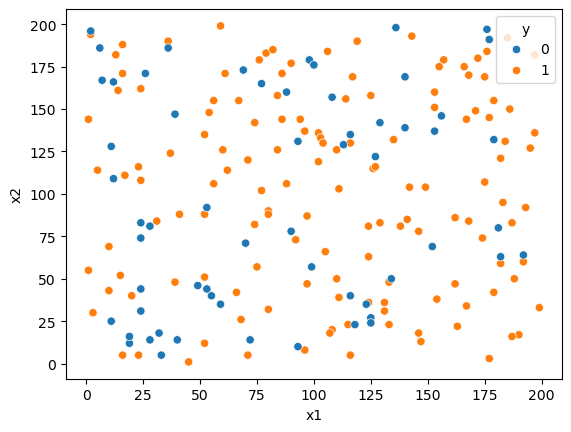

In [40]:
sns.scatterplot(resampling_df_sample, x="x1", y="x2", hue="y")
plt.show()

In [41]:
resampling_df_sample['y'].value_counts()

y
1    140
0     60
Name: count, dtype: int64

##### Bootstrap with Replacement

In [42]:
from sklearn.utils import resample
bootstrap_df_sample = resample(resampling_df_sample[resampling_df_sample['y']==0], replace=True, n_samples=140)
bootstrap_df_sample

x1   x2  y
168  176  197  0
182  136  198  0
140   12  166  0
159  116   40  0
146   12  109  0
..   ...  ... ..
161  129  142  0
194   24   74  0
179   90   78  0
154  127  122  0
168  176  197  0

[140 rows x 3 columns]

In [43]:
bootstrap_df_sample = pd.concat([bootstrap_df_sample, resampling_df_sample[resampling_df_sample['y']==1]])
bootstrap_df_sample

x1   x2  y
168  176  197  0
182  136  198  0
140   12  166  0
159  116   40  0
146   12  109  0
..   ...  ... ..
135   61  171  1
136  175  169  1
137  104  130  1
138  153  151  1
139  116    5  1

[280 rows x 3 columns]

In [44]:
bootstrap_df_sample['y'].value_counts()

y
0    140
1    140
Name: count, dtype: int64

In [45]:
bootstrap_df_sample['y'].value_counts()

y
0    140
1    140
Name: count, dtype: int64

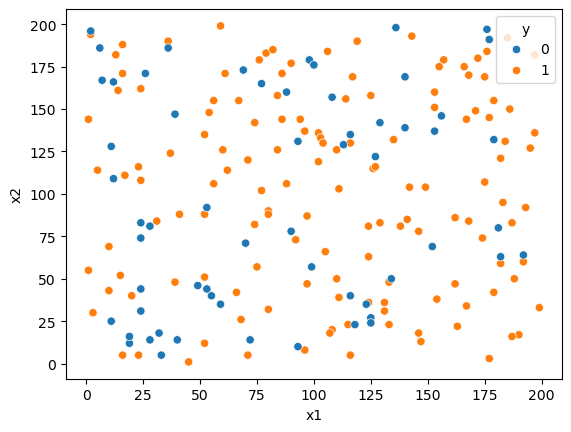

In [46]:
sns.scatterplot(resampling_df_sample, x="x1", y="x2", hue="y")
plt.show()

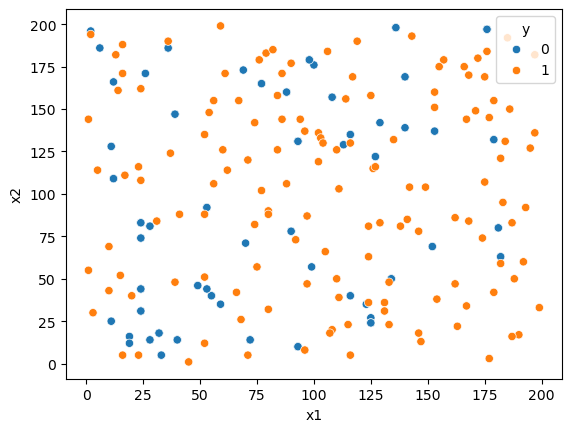

In [47]:
sns.scatterplot(bootstrap_df_sample, x="x1", y="x2", hue="y")
plt.show()

##### SMOTE

In [48]:
from imblearn.over_sampling import SMOTE
X, y = SMOTE(random_state=1).fit_resample(X= resampling_df_sample[['x1', 'x2']], y=resampling_df_sample[['y']])


In [49]:
y.value_counts()

y
0    140
1    140
Name: count, dtype: int64

In [50]:
X.nunique()

x1    154
x2    149
dtype: int64

In [51]:
X

x1   x2
0    190   17
1    157  179
2    143  193
3      1   55
4     37  124
..   ...  ...
275    7  181
276  151  195
277    8  167
278  131  127
279   89  162

[280 rows x 2 columns]

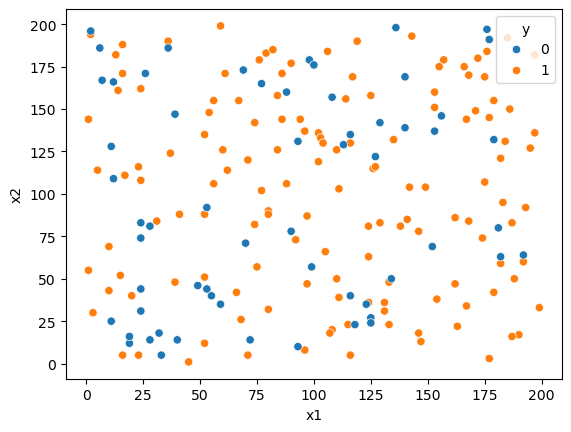

In [52]:
sns.scatterplot(resampling_df_sample, x="x1", y="x2", hue="y")
plt.show()

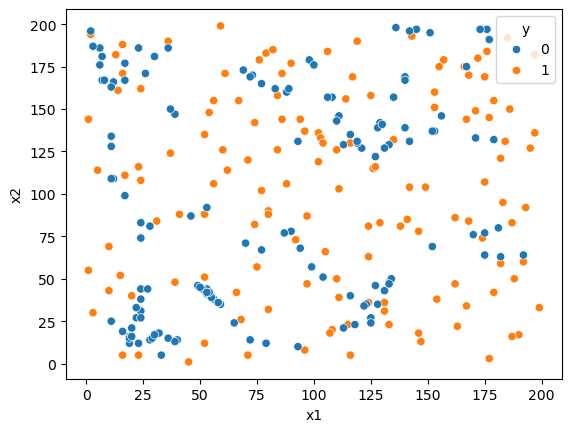

In [53]:
smote_df_sample = X.join(y)
sns.scatterplot(smote_df_sample, x="x1", y="x2", hue="y")
plt.show()

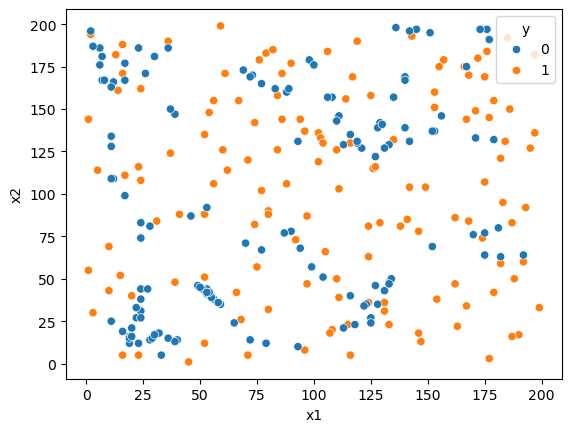

In [54]:
scat_df=X.join(y)
sns.scatterplot(scat_df, x='x1', y = 'x2', hue="y")
plt.show()

#### Actual
- Bootstrap Resampling with Replacement

In [55]:
from sklearn.utils import resample
resample_df = resample(out_logreg_df[out_logreg_df['genre_Rock']==1], replace=True, n_samples=2527)

In [56]:
resample_df['genre_Rock'].value_counts()

genre_Rock
1    2527
Name: count, dtype: int64

In [57]:
logreg_df = pd.concat([out_logreg_df[out_logreg_df['genre_Rock']!=1], resample_df])
logreg_df

total_time_s  genre_Rock
7              216           0
324            216           0
641            216           0
958            216           0
1275           216           0
...            ...         ...
2556           261           1
855            192           1
6672           252           1
1356           225           1
1              258           1

[5054 rows x 2 columns]

In [58]:
logreg_df['genre_Rock'].value_counts()


genre_Rock
0    2527
1    2527
Name: count, dtype: int64

In [59]:
logreg_df['total_time_s'].nunique()

105

## Train-Test-Split

In [60]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(logreg_df[['total_time_s']], logreg_df[['genre_Rock']], train_size=0.8, test_size=0.2)

In [61]:
X_train

total_time_s
1665            254
6080            230
4210            253
2301            256
19663           265
...             ...
4156            231
3735            217
2318            222
1075            212
3389            252

[4043 rows x 1 columns]

In [62]:
y_train

genre_Rock
1665            0
6080            0
4210            1
2301            0
19663           0
...           ...
4156            0
3735            0
2318            0
1075            0
3389            1

[4043 rows x 1 columns]

## Model Execution

In [63]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0).fit(X_train, y_train)


/opt/anaconda3/envs/DSenvTF/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
logreg.coef_

array([[0.01094307]])

In [65]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [66]:
y_pred = logreg.predict(X_test)

### Performance Checking

In [67]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[286, 221],
       [224, 280]])

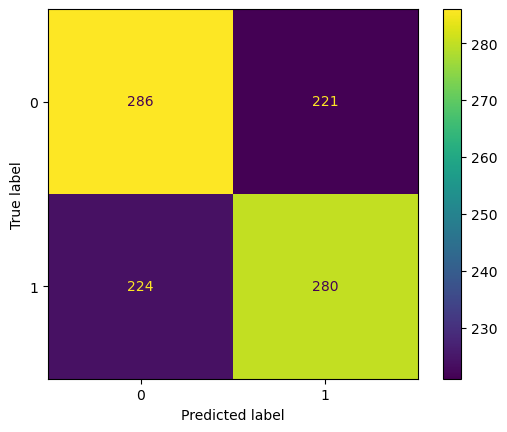

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display_logreg = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cm_display_logreg.plot()
plt.show()



In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(f'''
    Accuracy:{accuracy_score(y_pred, y_test)}
    Precision:{precision_score(y_pred, y_test)}
    Recall:{recall_score(y_pred, y_test)}
    F1:{f1_score(y_pred, y_test)}
'''
)


    Accuracy:0.559841740850643
    Precision:0.5555555555555556
    Recall:0.5588822355289421
    F1:0.5572139303482587



# Other Classification Techniques

## Naive-Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB().fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)

/opt/anaconda3/envs/DSenvTF/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


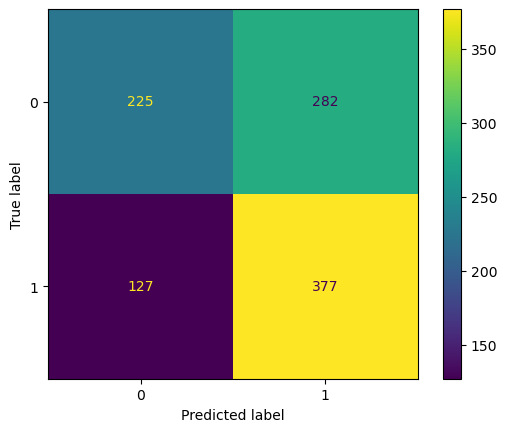


    Accuracy:0.5954500494559841
    Precision:0.748015873015873
    Recall:0.5720789074355084
    F1:0.648323301805675



In [71]:
cm_display_nb = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cm_display_nb.plot()
plt.show()

print(f'''
    Accuracy:{accuracy_score(y_pred, y_test)}
    Precision:{precision_score(y_pred, y_test)}
    Recall:{recall_score(y_pred, y_test)}
    F1:{f1_score(y_pred, y_test)}
'''
)

## K-Nearest Neighbor

In [72]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = kn_clf.predict(X_test)

/opt/anaconda3/envs/DSenvTF/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


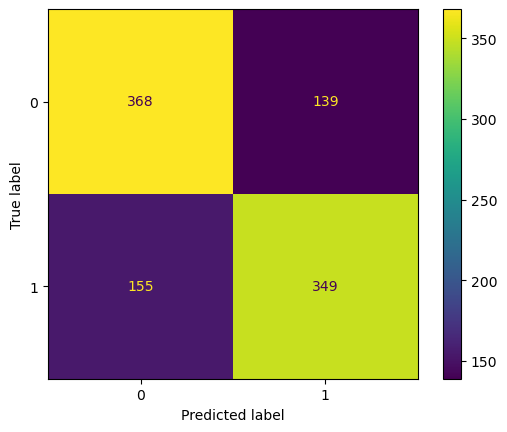


    Accuracy:0.7091988130563798
    Precision:0.6924603174603174
    Recall:0.7151639344262295
    F1:0.7036290322580645



In [73]:
cm_display_nb = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cm_display_nb.plot()
plt.show()

print(f'''
    Accuracy:{accuracy_score(y_pred, y_test)}
    Precision:{precision_score(y_pred, y_test)}
    Recall:{recall_score(y_pred, y_test)}
    F1:{f1_score(y_pred, y_test)}
'''
)

## Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

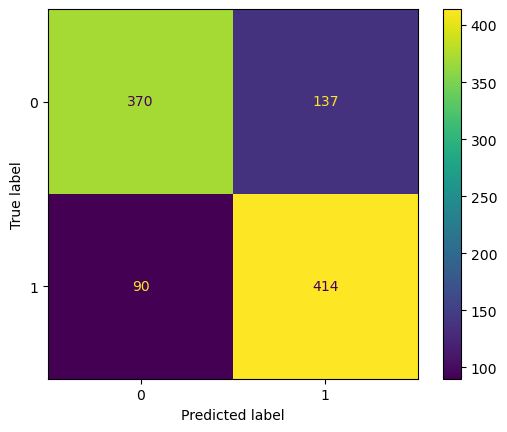


    Accuracy:0.7754698318496538
    Precision:0.8214285714285714
    Recall:0.7513611615245009
    F1:0.7848341232227488



In [75]:
cm_display_nb = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cm_display_nb.plot()
plt.show()

print(f'''
    Accuracy:{accuracy_score(y_pred, y_test)}
    Precision:{precision_score(y_pred, y_test)}
    Recall:{recall_score(y_pred, y_test)}
    F1:{f1_score(y_pred, y_test)}
'''
)

## Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

/opt/anaconda3/envs/DSenvTF/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


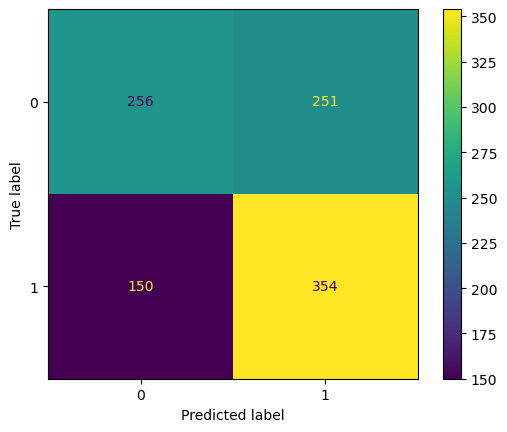


    Accuracy:0.6033630069238378
    Precision:0.7023809523809523
    Recall:0.5851239669421487
    F1:0.6384129846708747



In [77]:
cm_display_nb = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cm_display_nb.plot()
plt.show()

print(f'''
    Accuracy:{accuracy_score(y_pred, y_test)}
    Precision:{precision_score(y_pred, y_test)}
    Recall:{recall_score(y_pred, y_test)}
    F1:{f1_score(y_pred, y_test)}
'''
)

# Unsupervised 

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py

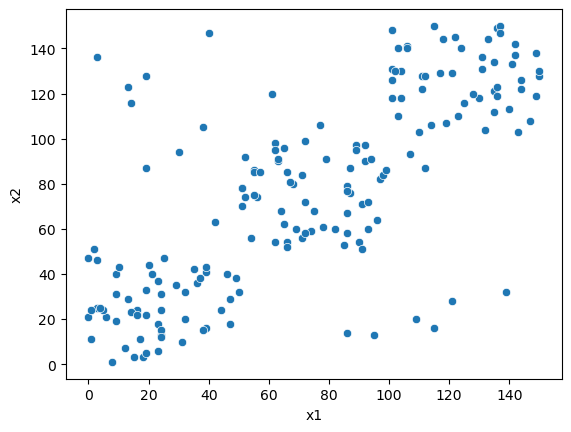

In [78]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()

np.random.seed(0)

for i in ['x1', 'x2']:
    df1[i] = np.random.randint(0,51,50)
    df2[i] = np.random.randint(51,101,50)
    df3[i] = np.random.randint(101,151,50)
    df4[i] = np.random.randint(0,151,30)

unsupervised_df = pd.concat([df1, df2, df3, df4])
sns.scatterplot(unsupervised_df, x='x1', y='x2')
plt.show()

## K-means Clustering
https://scikit-learn.org/stable/modules/clustering.html#k-means

In [79]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

results_df = pd.DataFrame()
sil_df = pd.DataFrame()

for i in range(2, 31):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(unsupervised_df[['x1', 'x2']])
    kmeans.inertia_
    result = [[i, round(kmeans.inertia_,0)]]
    results_df = pd.concat([results_df, pd.DataFrame(result, columns=['n', 'inertia'])])

    sil_result = silhouette_score(unsupervised_df[['x1', 'x2']], kmeans.predict(unsupervised_df[['x1', 'x2']]))
    sil_df = pd.concat([sil_df , pd.DataFrame([[i, sil_result]], columns = ['n', 'sil_score'])])

### Elbow Method

In [80]:
results_df.sort_values(by='inertia')

n   inertia
0  30    9928.0
0  29   10309.0
0  28   10677.0
0  27   10992.0
0  26   11631.0
0  25   12667.0
0  24   13105.0
0  23   13859.0
0  22   14386.0
0  21   14988.0
0  20   15798.0
0  19   16453.0
0  18   17840.0
0  17   19189.0
0  16   21677.0
0  15   24273.0
0  14   25235.0
0  13   28390.0
0  12   30540.0
0  11   33703.0
0  10   35893.0
0   9   40857.0
0   8   52921.0
0   7   69547.0
0   6   72114.0
0   5   81481.0
0   4   99356.0
0   3  141017.0
0   2  273075.0

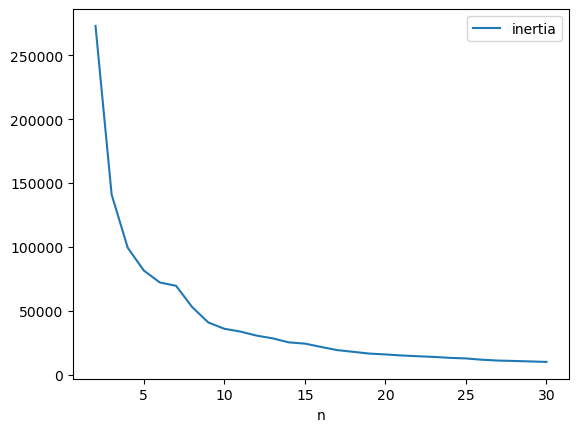

In [81]:
results_df.plot.line(x='n', y='inertia')
plt.show()

### Silhouette Score

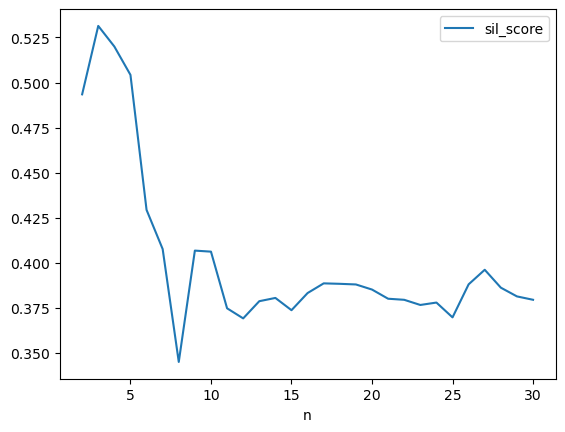

In [82]:
sil_df.plot.line(x='n', y='sil_score')
plt.show()

In [83]:
sil_df.sort_values(by='sil_score', ascending=False)

n  sil_score
0   3   0.531386
0   4   0.519960
0   5   0.504233
0   2   0.493441
0   6   0.429361
0   7   0.407644
0   9   0.406786
0  10   0.406205
0  27   0.396155
0  17   0.388620
0  18   0.388367
0  26   0.388083
0  19   0.388012
0  28   0.386228
0  20   0.385183
0  16   0.383249
0  29   0.381385
0  14   0.380538
0  21   0.380096
0  30   0.379511
0  22   0.379500
0  13   0.378727
0  24   0.377972
0  23   0.376639
0  11   0.374791
0  15   0.373735
0  25   0.369751
0  12   0.369198
0   8   0.345053

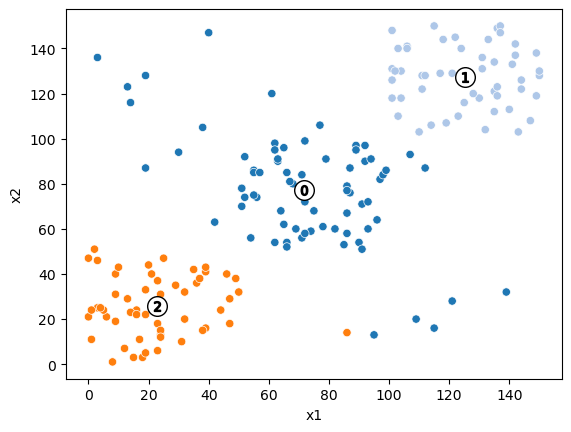

In [84]:
kmeans = KMeans(n_clusters=sil_df.sort_values(by='sil_score', ascending=False)['n'].values[0], random_state=0, n_init="auto").fit(unsupervised_df[['x1', 'x2']])

fig,ax = plt.subplots()
g = sns.scatterplot(unsupervised_df, x='x1', y='x2', hue=kmeans.labels_, palette='tab20', legend=False, markers=range(0,10), ax=ax)

centers = kmeans.cluster_centers_

ax.scatter(centers[:,0],centers[:,1],marker='o',c='white',s=200,edgecolor='k')
for i,c in enumerate(centers):
	ax.scatter(c[0],c[1],marker='$%d$'%i,s=50,edgecolor='k')

plt.show()

## DBSCAN
https://scikit-learn.org/stable/modules/clustering.html#dbscan

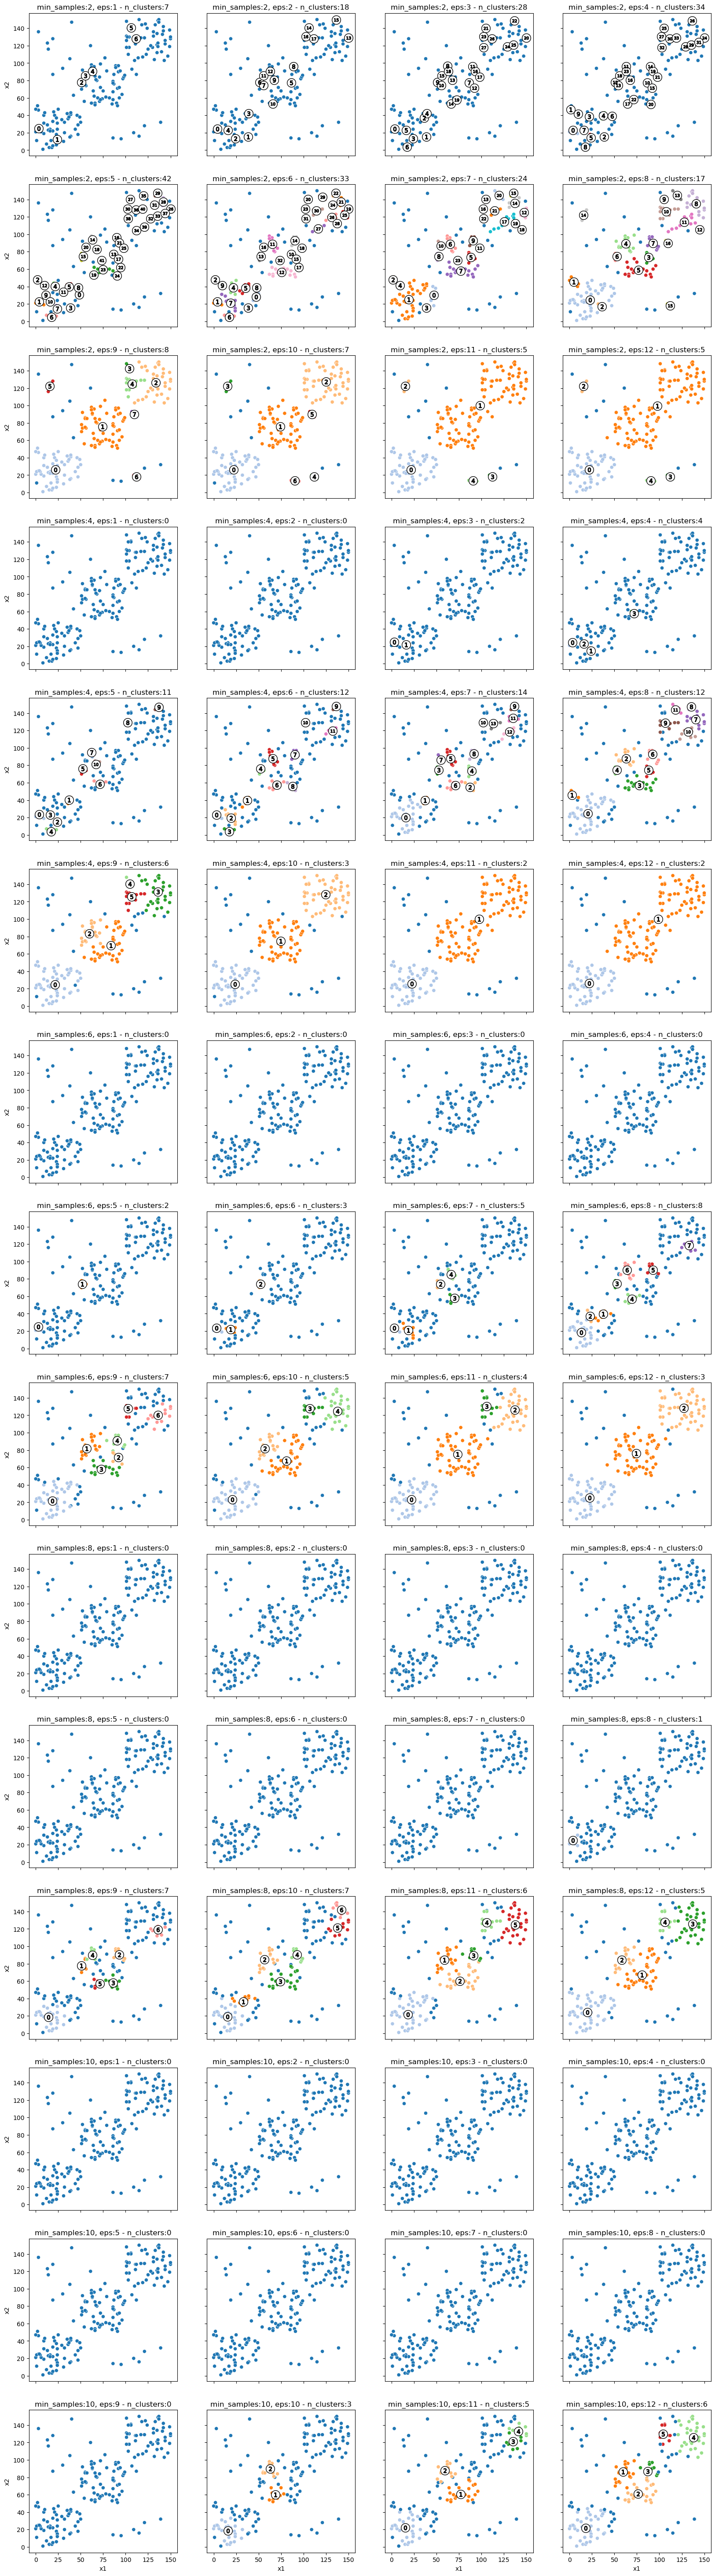

In [85]:
from sklearn.cluster import DBSCAN

db_results = pd.DataFrame()

fig, axs = plt.subplots(figsize=(20,75), nrows=15, ncols=4, sharex=True, sharey=True)
for samp_num in range(0, 5, 1):
    for i in range(0, 12):
        eps_val = i+1
        min_samp_val = (samp_num+1)*2
        dbs = DBSCAN(eps=eps_val, min_samples=min_samp_val).fit(unsupervised_df)
        labels = dbs.labels_
        centers_df = unsupervised_df.copy()
        centers_df['labels'] =  dbs.labels_
        centers = centers_df.iloc[dbs.core_sample_indices_].groupby('labels').mean().values
        # print(i)
        g = sns.scatterplot(unsupervised_df, x='x1', y='x2', hue=labels, palette='tab20', legend=False, markers=range(i+1,i), ax=axs[(i//4)+3*samp_num, i%4])
        axs[(i//4)+3*samp_num, i%4].set_title(f"min_samples:{min_samp_val}, eps:{eps_val} - n_clusters:{len(np.unique(labels))-1}")

        
        axs[(i//4)+3*samp_num, i%4].scatter(centers[:,0],centers[:,1],marker='o',c='white',s=200,edgecolor='k')
        for ix,c in enumerate(centers):
            axs[(i//4)+3*samp_num, i%4].scatter(c[0],c[1],marker='$%d$'%ix,s=50,edgecolor='k')

        db_results = pd.concat([db_results, pd.DataFrame([[min_samp_val, eps_val, len(np.unique(labels))-1]], columns = ["min samples", "eps", "n_clusters"])])
# plt.suptitle("DBSCAN")
# plt.tight_layout()
plt.show()


In [86]:
db_results.reset_index(drop=True).sort_values(by='n_clusters')

min samples  eps  n_clusters
39            8    4           0
38            8    3           0
25            6    2           0
26            6    3           0
48           10    1           0
27            6    4           0
41            8    6           0
13            4    2           0
12            4    1           0
40            8    5           0
36            8    1           0
49           10    2           0
50           10    3           0
51           10    4           0
52           10    5           0
53           10    6           0
54           10    7           0
55           10    8           0
56           10    9           0
37            8    2           0
42            8    7           0
24            6    1           0
43            8    8           1
23            4   12           2
22            4   11           2
28            6    5           2
14            4    3           2
21            4   10           3
35            6   12           3
57           10   10           3
29            6    6           3
15            4    4           4
34            6   11           4
58           10   11           5
30            6    7           5
11            2   12           5
33            6   10           5
10            2   11           5
47            8   12           5
46            8   11           6
59           10   12           6
20            4    9           6
0             2    1           7
32            6    9           7
44            8    9           7
45            8   10           7
9             2   10           7
31            6    8           8
8             2    9           8
16            4    5          11
19            4    8          12
17            4    6          12
18            4    7          14
7             2    8          17
1             2    2          18
6             2    7          24
2             2    3          28
5             2    6          33
3             2    4          34
4             2    5          42

In [87]:
dbs_short_list = db_results[db_results['n_clusters']==3][['min samples', 'eps']].values
dbs_short_list

array([[ 4, 10],
       [ 6,  6],
       [ 6, 12],
       [10, 10]])

In [88]:
[i for i in enumerate(dbs_short_list) ]

[(0, array([ 4, 10])),
 (1, array([6, 6])),
 (2, array([ 6, 12])),
 (3, array([10, 10]))]

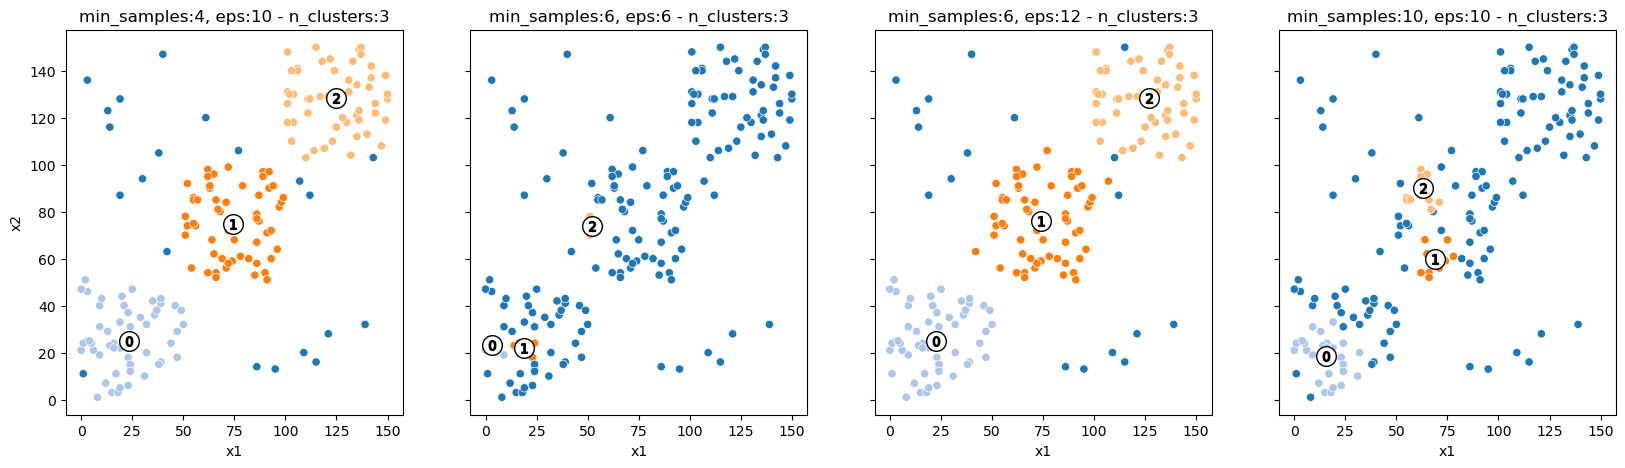

In [89]:
db_len = len(dbs_short_list)

fig_width = db_len*5 if db_len<4 else 20
fig_height = db_len//4+1*5 if db_len >4 else 5 

fig, axs = plt.subplots(figsize=(fig_width, fig_height), nrows=(db_len-1)//4+1, ncols=4 if db_len >=4 else db_len, sharex=True, sharey=True)

for enum, dbs_short_list_val in enumerate(dbs_short_list):
    eps_val = dbs_short_list_val[1]
    min_samp_val = dbs_short_list_val[0]
    dbs = DBSCAN(eps=eps_val, min_samples=min_samp_val).fit(unsupervised_df)
    labels = dbs.labels_
    centers_df = unsupervised_df.copy()
    centers_df['labels'] =  dbs.labels_
    centers = centers_df.iloc[dbs.core_sample_indices_].groupby('labels').mean().values
    # print(i)
    
    if db_len>4:
        g = sns.scatterplot(unsupervised_df, x='x1', y='x2', hue=labels, palette='tab20', legend=False, markers=range(i+1,i), ax=axs[(enum//4), enum%4])
        axs[(enum//4), enum%4].set_title(f"min_samples:{min_samp_val}, eps:{eps_val} - n_clusters:{len(np.unique(labels))-1}")

        axs[(enum//4), enum%4].scatter(centers[:,0],centers[:,1],marker='o',c='white',s=200,edgecolor='k')
        for ix,c in enumerate(centers):
            axs[(enum//4), enum%4].scatter(c[0],c[1],marker='$%d$'%ix,s=50,edgecolor='k')
        
    else:
        g = sns.scatterplot(unsupervised_df, x='x1', y='x2', hue=labels, palette='tab20', legend=False, markers=range(i+1,i), ax=axs[enum])
        axs[enum].set_title(f"min_samples:{min_samp_val}, eps:{eps_val} - n_clusters:{len(np.unique(labels))-1}")

        axs[enum].scatter(centers[:,0],centers[:,1],marker='o',c='white',s=200,edgecolor='k')
        for ix,c in enumerate(centers):
            axs[enum].scatter(c[0],c[1],marker='$%d$'%ix,s=50,edgecolor='k')

    db_results = pd.concat([db_results, pd.DataFrame([[min_samp_val, eps_val, len(np.unique(labels))-1]], columns = ["min samples", "eps", "n_clusters"])])
# plt.suptitle("DBSCAN")
# plt.tight_layout()
plt.show()

## Heirarchical Clustering
- Divisive
- Agglomerative (shown below)

Additional Sources: https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

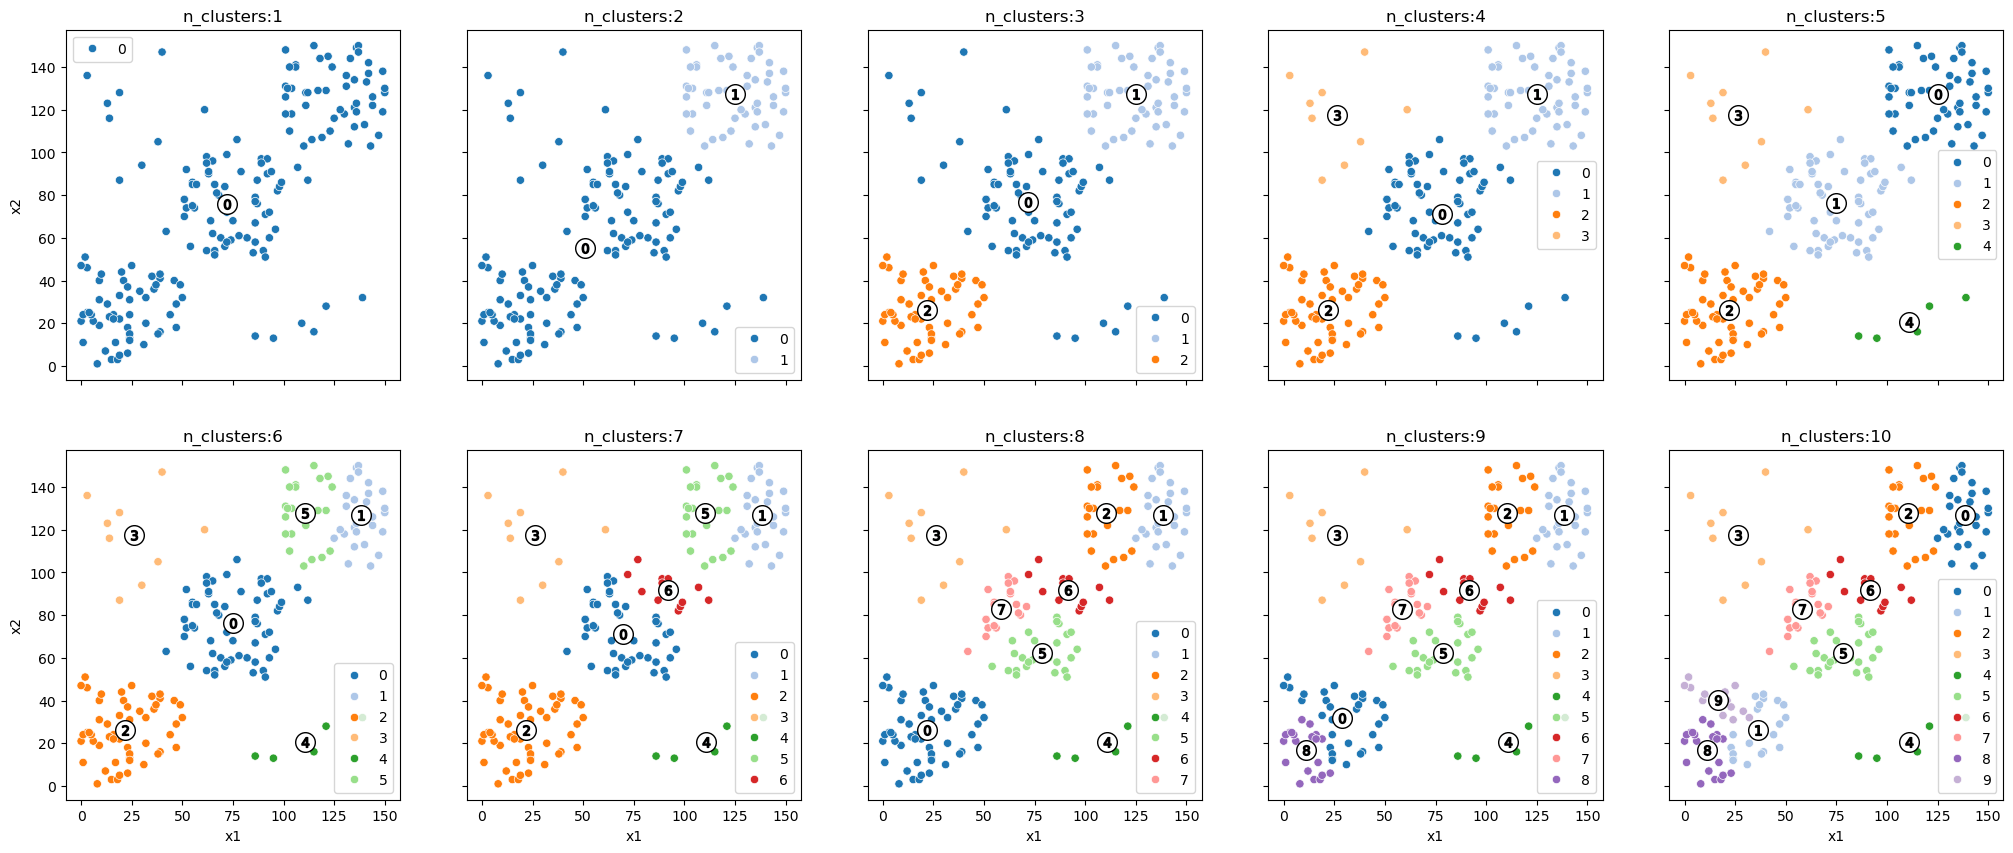

In [90]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

fig, axs = plt.subplots(figsize=(25, 10), nrows=2, ncols=5, sharex=True, sharey=True)


for i in range(0,10):
    agglo = AgglomerativeClustering(n_clusters=i+1,metric='euclidean',linkage='ward')
    agglo.fit(unsupervised_df)
    labels = agglo.labels_
    centers_df = unsupervised_df.copy()
    centers_df['labels'] =  agglo.labels_
    centers = centers_df.groupby('labels').mean().values

    # print(np.unique(labels))

    # g = sns.scatterplot(unsupervised_df, x='x1', y='x2', hue=labels, palette='tab20', legend=True, markers=range(0,len(np.unique(labels))), ax=ax)
    g = sns.scatterplot(unsupervised_df, x='x1', y='x2', hue=labels, palette='tab20', legend=True, markers=range(0,len(np.unique(labels))), ax=axs[i//5, i%5])
    axs[i//5, i%5].set_title(f"n_clusters:{i+1}")

    axs[i//5, i%5].scatter(centers[:,0],centers[:,1],marker='o',c='white',s=200,edgecolor='k')
    for ix,c in enumerate(centers):
        axs[i//5, i%5].scatter(c[0],c[1],marker='$%d$'%ix,s=50,edgecolor='k')
plt.show()

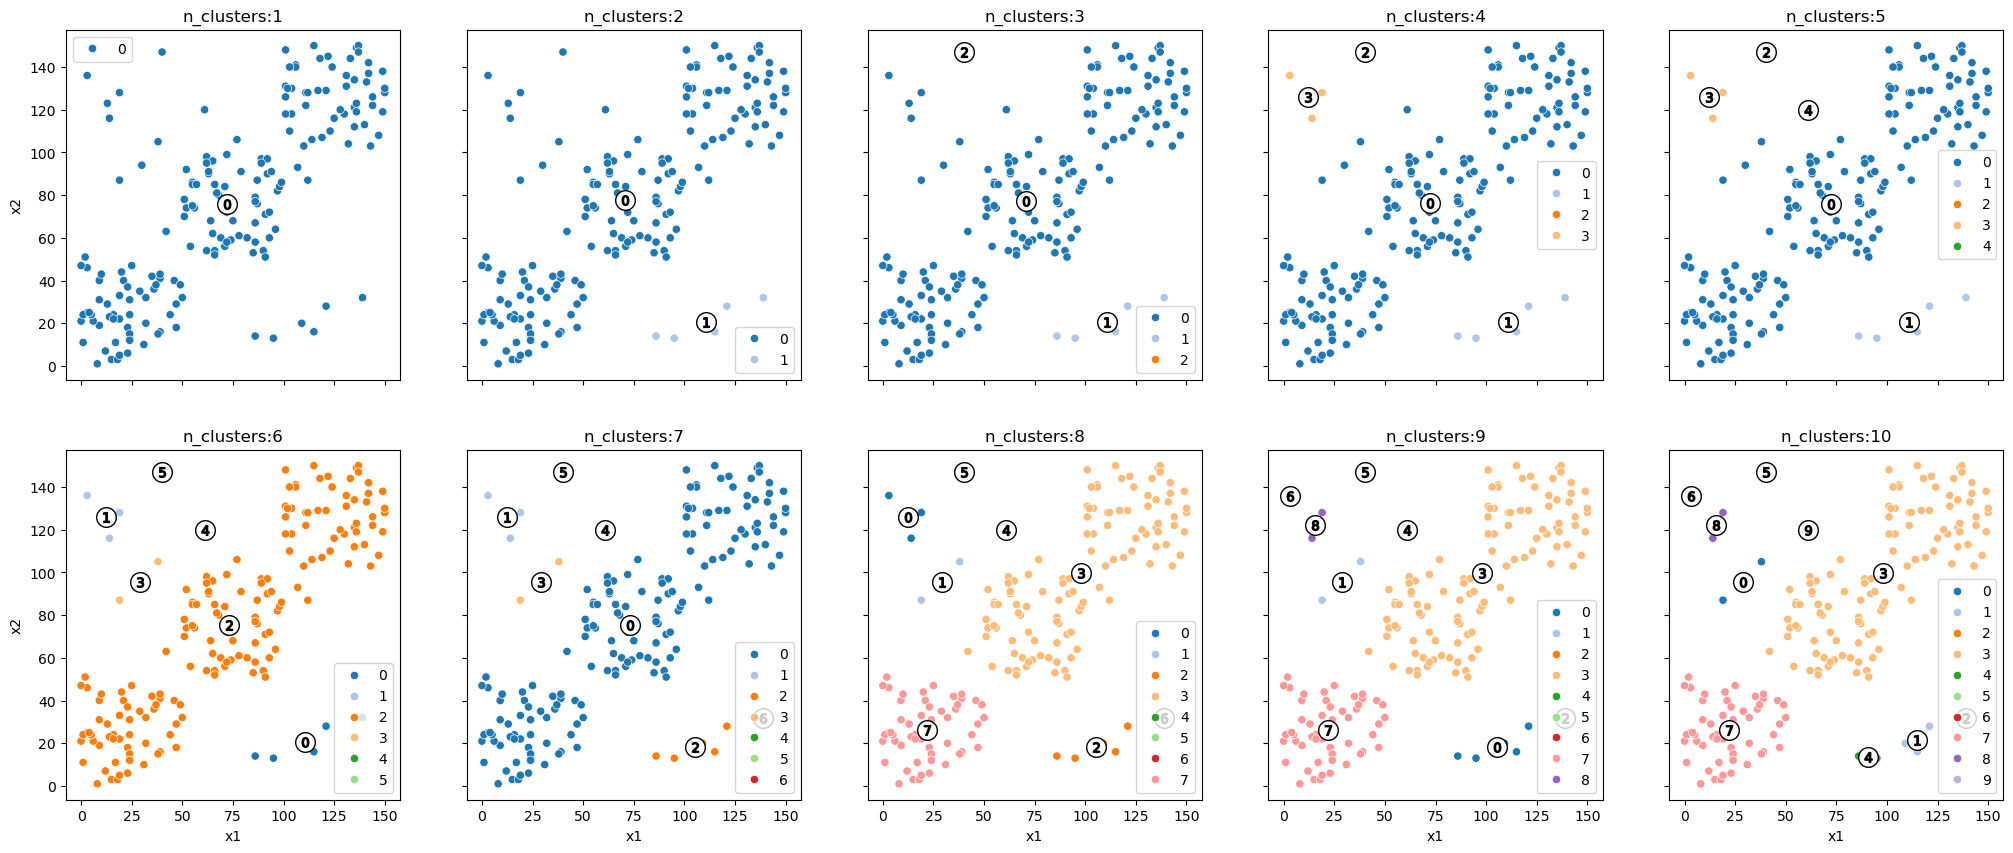

In [91]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

fig, axs = plt.subplots(figsize=(25, 10), nrows=2, ncols=5, sharex=True, sharey=True)


for i in range(0,10):
    agglo = AgglomerativeClustering(n_clusters=i+1,metric='euclidean',linkage='single')
    agglo.fit(unsupervised_df)
    labels = agglo.labels_
    centers_df = unsupervised_df.copy()
    centers_df['labels'] =  agglo.labels_
    centers = centers_df.groupby('labels').mean().values

    # print(np.unique(labels))

    # g = sns.scatterplot(unsupervised_df, x='x1', y='x2', hue=labels, palette='tab20', legend=True, markers=range(0,len(np.unique(labels))), ax=ax)
    g = sns.scatterplot(unsupervised_df, x='x1', y='x2', hue=labels, palette='tab20', legend=True, markers=range(0,len(np.unique(labels))), ax=axs[i//5, i%5])
    axs[i//5, i%5].set_title(f"n_clusters:{i+1}")

    axs[i//5, i%5].scatter(centers[:,0],centers[:,1],marker='o',c='white',s=200,edgecolor='k')
    for ix,c in enumerate(centers):
        axs[i//5, i%5].scatter(c[0],c[1],marker='$%d$'%ix,s=50,edgecolor='k')
plt.show()

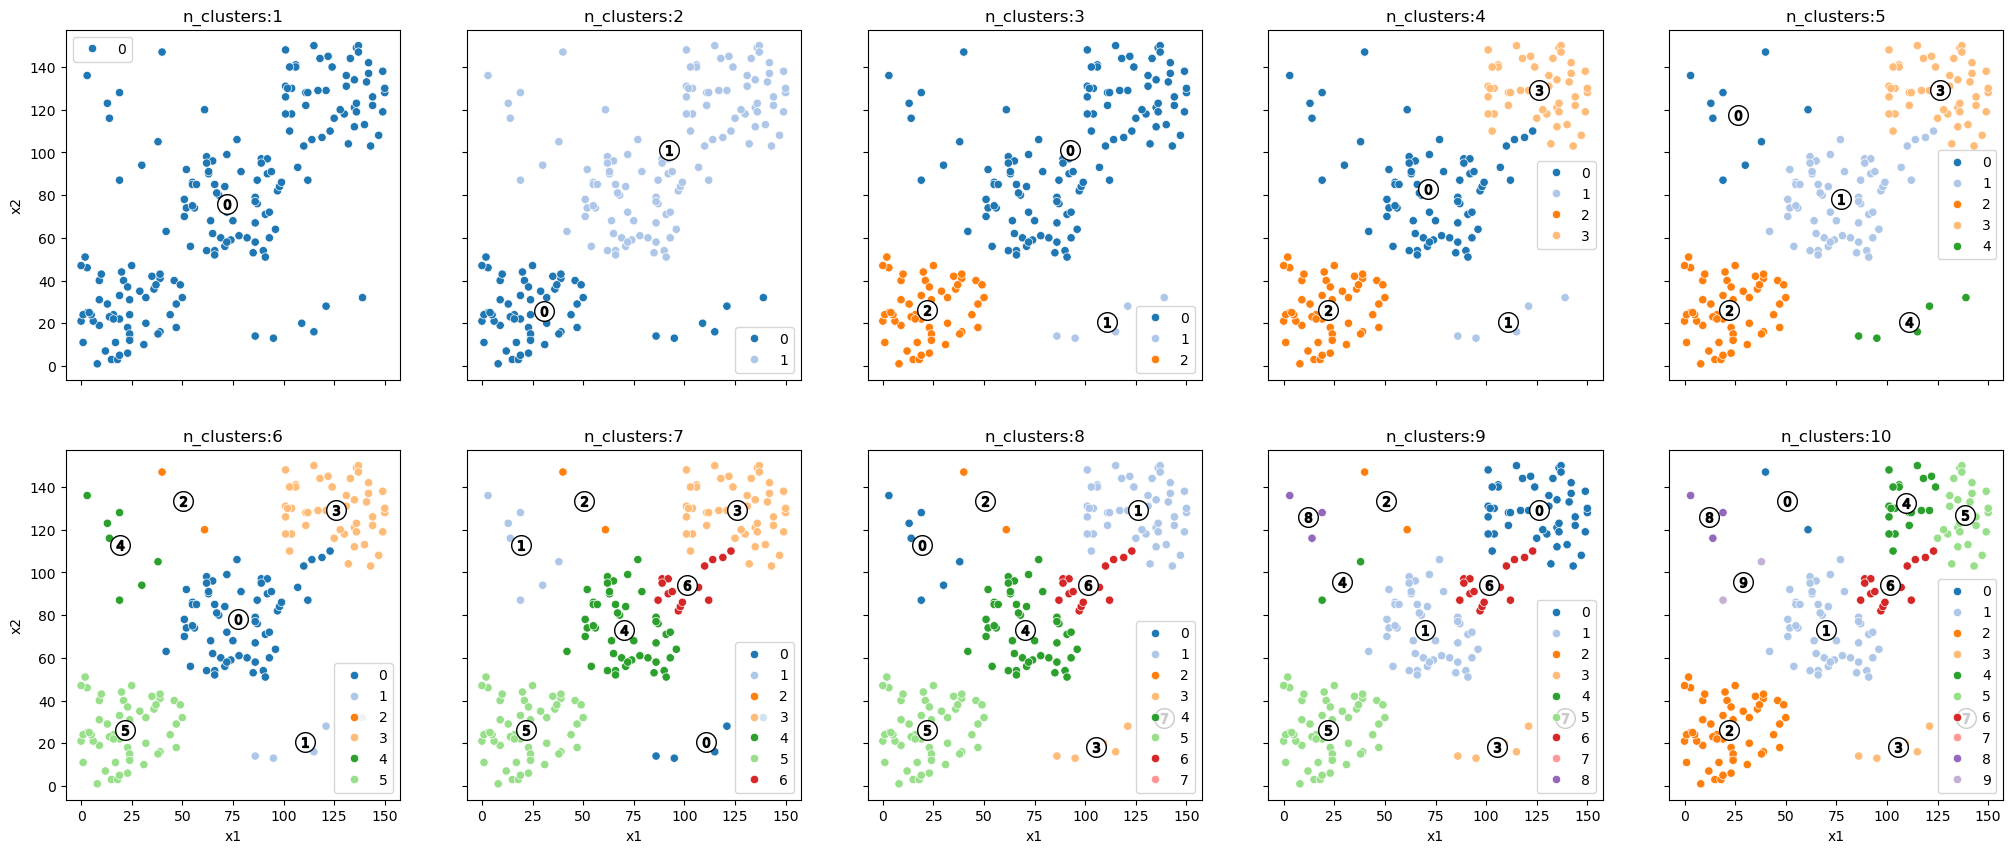

In [92]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

fig, axs = plt.subplots(figsize=(25, 10), nrows=2, ncols=5, sharex=True, sharey=True)


for i in range(0,10):
    agglo = AgglomerativeClustering(n_clusters=i+1,metric='euclidean',linkage='average')
    agglo.fit(unsupervised_df)
    labels = agglo.labels_
    centers_df = unsupervised_df.copy()
    centers_df['labels'] =  agglo.labels_
    centers = centers_df.groupby('labels').mean().values

    # print(np.unique(labels))

    # g = sns.scatterplot(unsupervised_df, x='x1', y='x2', hue=labels, palette='tab20', legend=True, markers=range(0,len(np.unique(labels))), ax=ax)
    g = sns.scatterplot(unsupervised_df, x='x1', y='x2', hue=labels, palette='tab20', legend=True, markers=range(0,len(np.unique(labels))), ax=axs[i//5, i%5])
    axs[i//5, i%5].set_title(f"n_clusters:{i+1}")

    axs[i//5, i%5].scatter(centers[:,0],centers[:,1],marker='o',c='white',s=200,edgecolor='k')
    for ix,c in enumerate(centers):
        axs[i//5, i%5].scatter(c[0],c[1],marker='$%d$'%ix,s=50,edgecolor='k')
plt.show()

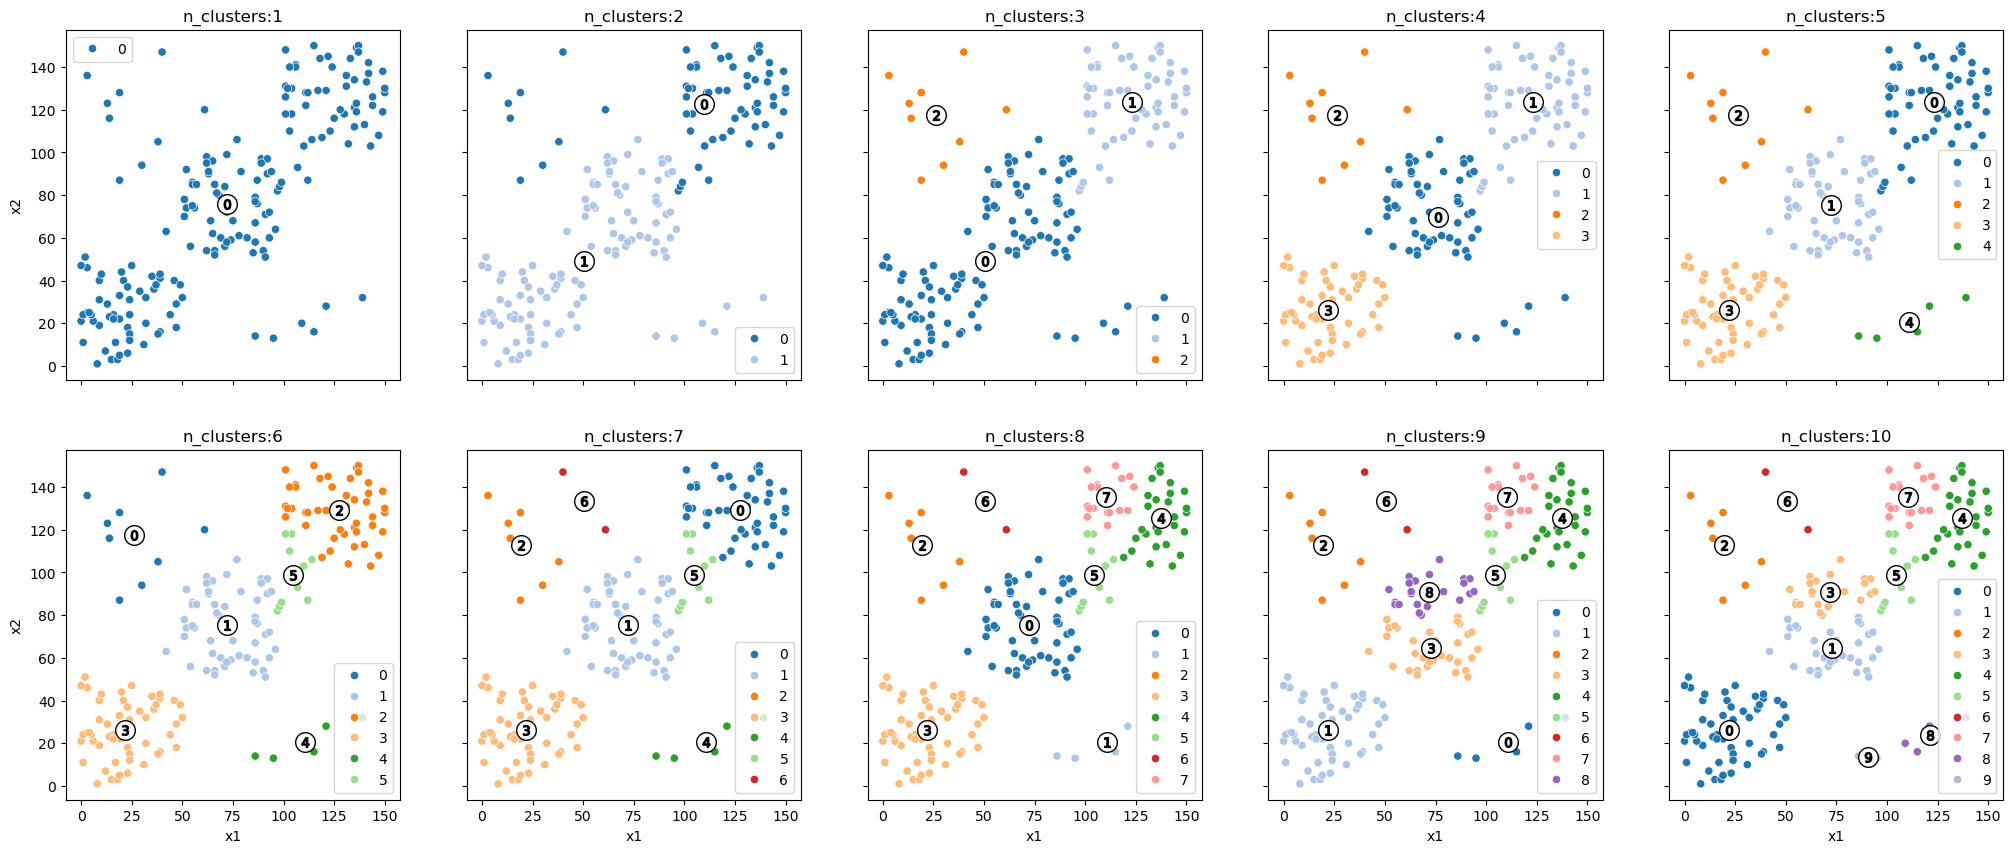

In [93]:
from sklearn.cluster import AgglomerativeClustering

fig, axs = plt.subplots(figsize=(25, 10), nrows=2, ncols=5, sharex=True, sharey=True)


for i in range(0,10):
    agglo = AgglomerativeClustering(n_clusters=i+1,metric='euclidean',linkage='complete')
    agglo.fit(unsupervised_df)
    labels = agglo.labels_
    centers_df = unsupervised_df.copy()
    centers_df['labels'] =  agglo.labels_
    centers = centers_df.groupby('labels').mean().values

    # print(np.unique(labels))

    # g = sns.scatterplot(unsupervised_df, x='x1', y='x2', hue=labels, palette='tab20', legend=True, markers=range(0,len(np.unique(labels))), ax=ax)
    g = sns.scatterplot(unsupervised_df, x='x1', y='x2', hue=labels, palette='tab20', legend=True, markers=range(0,len(np.unique(labels))), ax=axs[i//5, i%5])
    axs[i//5, i%5].set_title(f"n_clusters:{i+1}")

    axs[i//5, i%5].scatter(centers[:,0],centers[:,1],marker='o',c='white',s=200,edgecolor='k')
    for ix,c in enumerate(centers):
        axs[i//5, i%5].scatter(c[0],c[1],marker='$%d$'%ix,s=50,edgecolor='k')
plt.show()

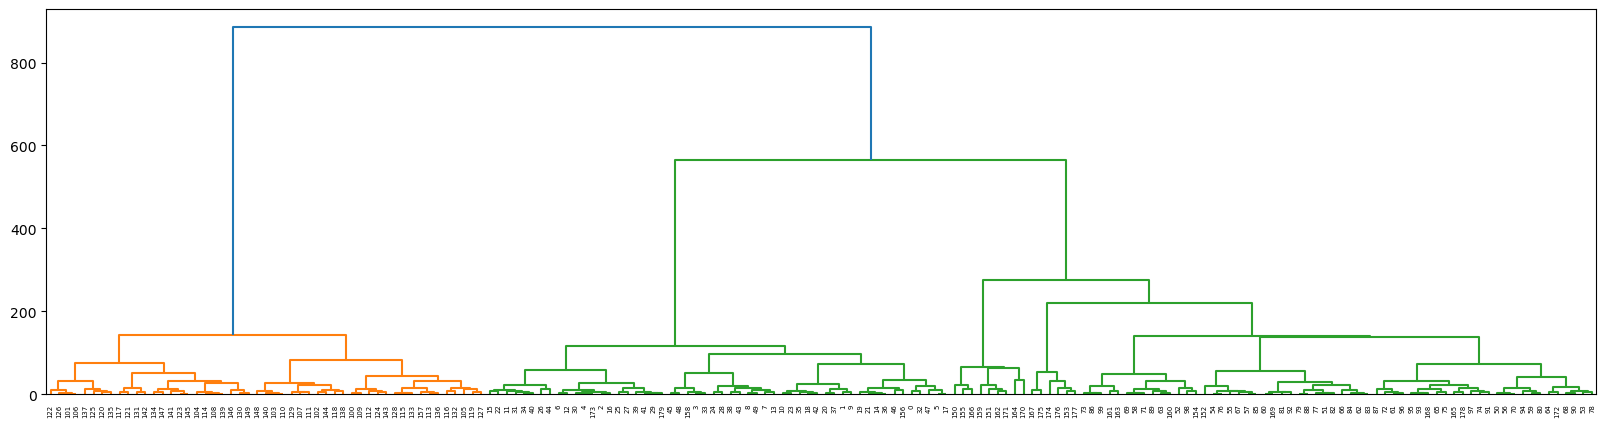

In [94]:
from scipy.cluster.hierarchy import dendrogram, linkage

fig,ax = plt.subplots(figsize=(20,5))
g = dendrogram(linkage(unsupervised_df.values,method='ward'))
plt.show()

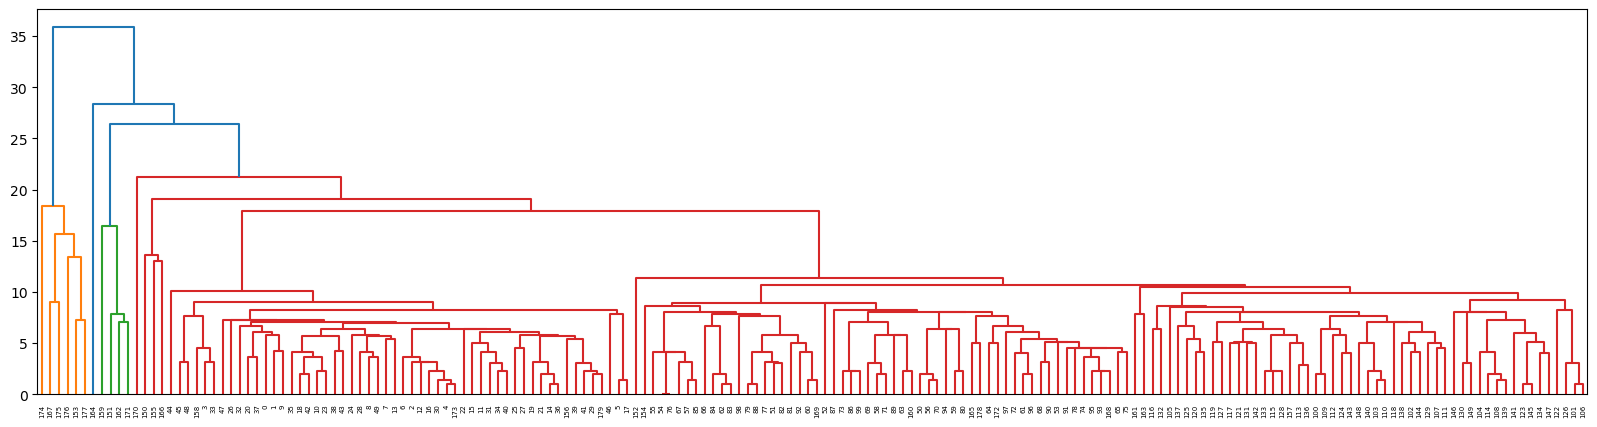

In [95]:
fig,ax = plt.subplots(figsize=(20,5))
g = dendrogram(linkage(unsupervised_df.values,method='single'))
plt.show()

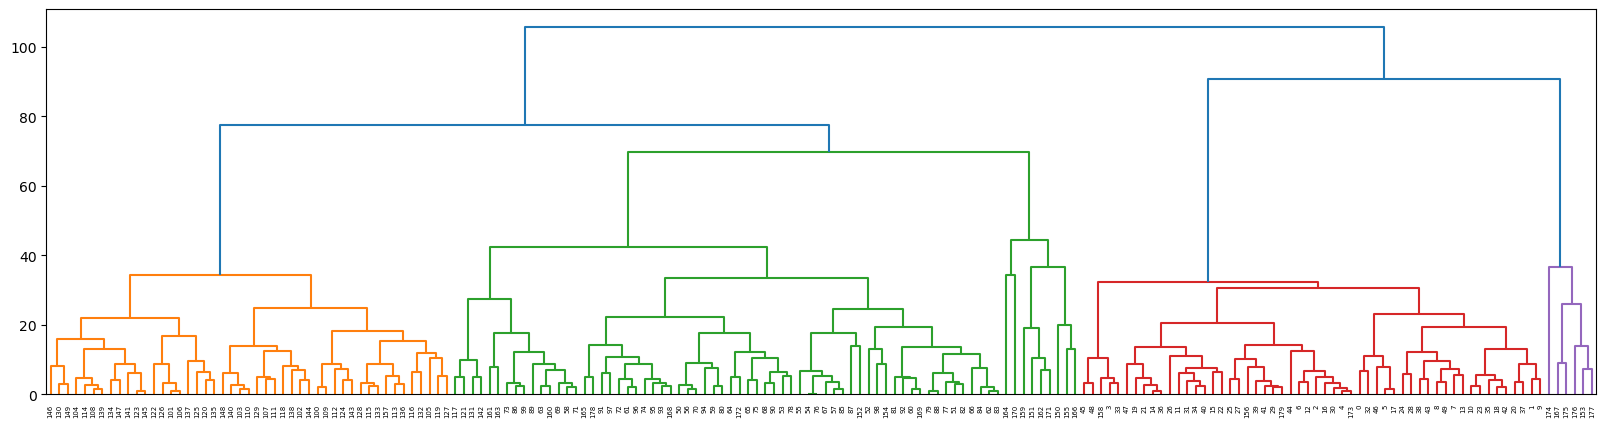

In [96]:
fig,ax = plt.subplots(figsize=(20,5))
g = dendrogram(linkage(unsupervised_df.values,method='average'))
plt.show()

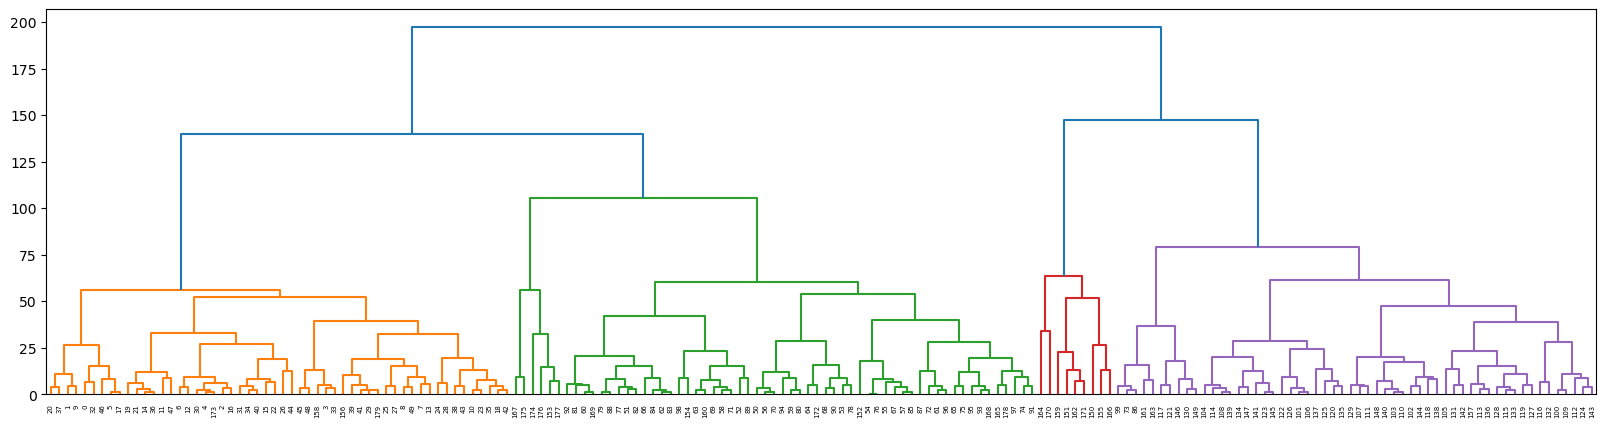

In [97]:
fig,ax = plt.subplots(figsize=(20,5))
g = dendrogram(linkage(unsupervised_df.values,method='complete'))
plt.show()

# Dimensionality Reduction - [Principle Component Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [98]:
resampling_df_sample = pd.DataFrame()
resampling_df_sample['x1'] = np.random.randint(1, 200, 200)
resampling_df_sample['x2'] = np.random.randint(1, 200, 200)
resampling_df_sample['x3'] = np.random.randint(1, 200, 200)
repeat_list = list(repeat(1, 140))
repeat_list.extend(list(repeat(0, 60)))
resampling_df_sample['y'] = repeat_list
resampling_df_sample

x1   x2   x3  y
0    123  174  109  1
1     84  186   90  1
2    136  120  125  1
3     62  165  118  1
4    142  106  101  1
..   ...  ...  ... ..
195   92  195  134  0
196  146  103  169  0
197  164   10  151  0
198  195    3   31  0
199  149  117   20  0

[200 rows x 4 columns]

In [99]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()

np.random.seed(0)

for i in ['x1', 'x2', 'x3', 'x4']:
    df1[i] = np.random.randint(0,51,50)
    df2[i] = np.random.randint(51,101,50)
    df3[i] = np.random.randint(101,151,50)
    df4[i] = np.random.randint(0,151,70)
repeat_list = list(repeat(1, 160))
repeat_list.extend(list(repeat(0, 60)))



pca_sample_df_1 = pd.concat([df1, df2, df3, df4])
pca_sample_df_1['y'] = repeat_list
# sns.scatterplot(unsupervised_df, x='x1', y='x2')
# plt.show()
pca_sample_df_1

x1   x2   x3   x4  y
0    44   29   27   41  1
1    47    3   47   46  1
2     0   35   35    0  1
3     3   39   19   12  1
4     3    9   12    9  1
..  ...  ...  ...  ... ..
65    2   91  115   30  0
66   27   43   87   19  0
67   53   63  124    4  0
68   51  148  107  148  0
69  148    9   52  106  0

[220 rows x 5 columns]

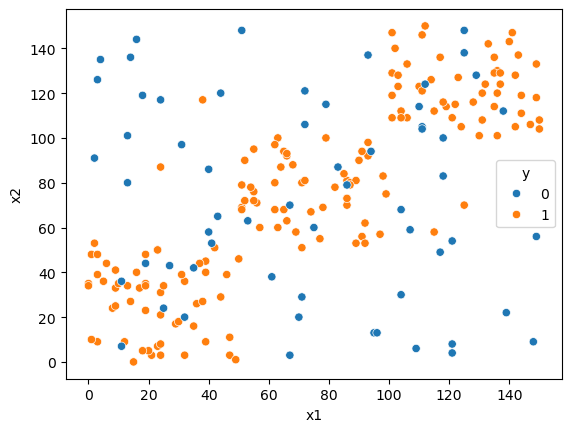

In [100]:
sns.scatterplot(pca_sample_df_1, x='x1', y='x2', hue='y')
plt.show()

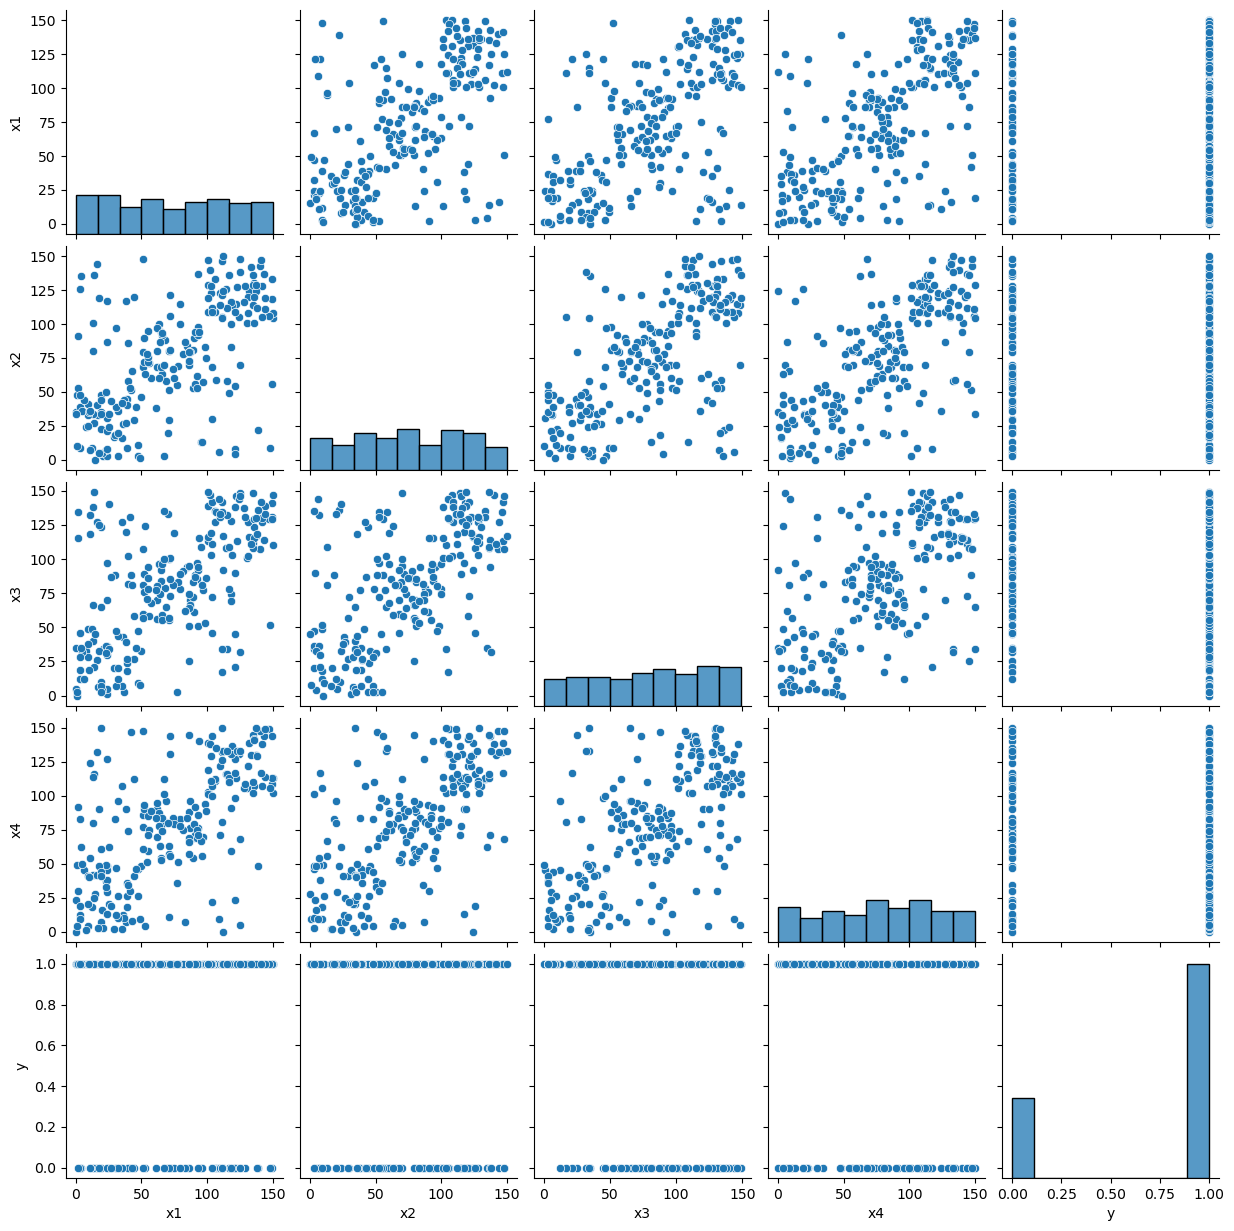

In [101]:
sns.pairplot(pca_sample_df_1)
plt.show()

In [102]:
pca_sample_df = pca_sample_df_1[['x1', 'x2', 'x3', 'x4']]
pca_sample_df

x1   x2   x3   x4
0    44   29   27   41
1    47    3   47   46
2     0   35   35    0
3     3   39   19   12
4     3    9   12    9
..  ...  ...  ...  ...
65    2   91  115   30
66   27   43   87   19
67   53   63  124    4
68   51  148  107  148
69  148    9   52  106

[220 rows x 4 columns]

In [103]:
from sklearn.decomposition import PCA

pca = PCA().fit(pca_sample_df)

pca.explained_variance_ratio_


array([0.70396949, 0.10875269, 0.10570989, 0.08156793])

In [104]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(pca_sample_df)

pca.explained_variance_ratio_


array([0.70396949, 0.10875269])

In [105]:
print(pca.transform(pca_sample_df))

[[-8.06742249e+01  1.65056363e+01]
 [-7.92524562e+01  2.62388221e+01]
 [-1.17380531e+02 -1.91078377e+01]
 [-1.15667990e+02 -1.63928552e+01]
 [-1.35110757e+02  3.98013284e-01]
 [-1.09068487e+02  2.74861563e+01]
 [-1.00922461e+02 -1.85160284e+01]
 [-1.22154263e+02  7.52060667e+00]
 [-1.20980476e+02  1.37614569e+01]
 [-6.28655187e+01  1.07362943e+01]
 [-9.31576193e+01  1.14985530e+01]
 [-9.52100553e+01 -4.83605806e+00]
 [-9.83083412e+01 -1.92082984e+01]
 [-9.54637196e+01  9.58979473e+00]
 [-1.00752971e+02  4.68302602e+00]
 [-1.07652957e+02 -2.27677514e+00]
 [-1.21134978e+02 -4.35115616e+00]
 [-9.61747605e+01  1.43079389e+01]
 [-8.46722288e+01  7.30971763e+00]
 [-9.35383903e+01  6.66600758e+00]
 [-6.83294609e+01  1.06533882e+01]
 [-1.11775516e+02  1.08170705e+01]
 [-1.22376692e+02  2.47611385e+00]
 [-1.04706935e+02  1.33812572e+01]
 [-9.52995330e+01 -4.52336824e-01]
 [-8.72645037e+01 -1.48307472e+01]
 [-1.19049191e+02 -6.76129104e+00]
 [-1.06955344e+02 -1.17500462e+01]
 [-1.28675976e+02  1

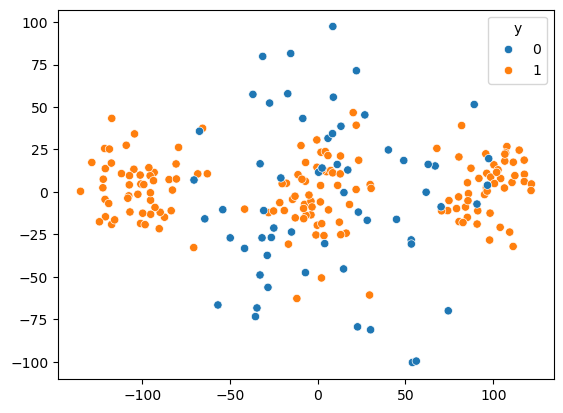

In [106]:
sns.scatterplot(x=pca.transform(pca_sample_df)[:,0], y=pca.transform(pca_sample_df)[:,1], hue=pca_sample_df_1['y'])
plt.show()

# Market Basket Analysis

https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules

## Dataset Preprocessing

In [107]:
orig_dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [108]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs', 'Onion'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

Creating a dataframe from lists of unequal lengths generate null values.

In [109]:
pd.DataFrame(dataset)

0        1             2             3          4       5
0  Milk    Onion        Nutmeg  Kidney Beans       Eggs  Yogurt
1  Dill    Onion        Nutmeg  Kidney Beans       Eggs  Yogurt
2  Milk    Apple  Kidney Beans          Eggs      Onion    None
3  Milk  Unicorn          Corn  Kidney Beans     Yogurt    None
4  Corn    Onion         Onion  Kidney Beans  Ice cream    Eggs

In [110]:
dataset_proc = [", ".join(i) for i in dataset]
dataset_proc

['Milk, Onion, Nutmeg, Kidney Beans, Eggs, Yogurt',
 'Dill, Onion, Nutmeg, Kidney Beans, Eggs, Yogurt',
 'Milk, Apple, Kidney Beans, Eggs, Onion',
 'Milk, Unicorn, Corn, Kidney Beans, Yogurt',
 'Corn, Onion, Onion, Kidney Beans, Ice cream, Eggs']

## Single string for items purchased
Some datasets may appear this way and need to be addressed.

In [111]:
mb_df = pd.DataFrame(dataset_proc, columns=['purchased_items'])
mb_df['order_id'] = range(0, mb_df.shape[0])

mb_df

purchased_items  order_id
0    Milk, Onion, Nutmeg, Kidney Beans, Eggs, Yogurt         0
1    Dill, Onion, Nutmeg, Kidney Beans, Eggs, Yogurt         1
2             Milk, Apple, Kidney Beans, Eggs, Onion         2
3          Milk, Unicorn, Corn, Kidney Beans, Yogurt         3
4  Corn, Onion, Onion, Kidney Beans, Ice cream, Eggs         4

In [112]:
mb_df.purchased_items.str.split(", ")

0    [Milk, Onion, Nutmeg, Kidney Beans, Eggs, Yogurt]
1    [Dill, Onion, Nutmeg, Kidney Beans, Eggs, Yogurt]
2             [Milk, Apple, Kidney Beans, Eggs, Onion]
3          [Milk, Unicorn, Corn, Kidney Beans, Yogurt]
4    [Corn, Onion, Onion, Kidney Beans, Ice cream, ...
Name: purchased_items, dtype: object

In [113]:
expanded_df = mb_df.purchased_items.str.split(", ", expand=True)
expanded_df

0        1             2             3          4       5
0  Milk    Onion        Nutmeg  Kidney Beans       Eggs  Yogurt
1  Dill    Onion        Nutmeg  Kidney Beans       Eggs  Yogurt
2  Milk    Apple  Kidney Beans          Eggs      Onion    None
3  Milk  Unicorn          Corn  Kidney Beans     Yogurt    None
4  Corn    Onion         Onion  Kidney Beans  Ice cream    Eggs

In [114]:
mb_df[["item_"+str(i) for i in expanded_df.columns]] = mb_df.purchased_items.str.split(", ", expand=True)
mb_df

purchased_items  order_id item_0  \
0    Milk, Onion, Nutmeg, Kidney Beans, Eggs, Yogurt         0   Milk   
1    Dill, Onion, Nutmeg, Kidney Beans, Eggs, Yogurt         1   Dill   
2             Milk, Apple, Kidney Beans, Eggs, Onion         2   Milk   
3          Milk, Unicorn, Corn, Kidney Beans, Yogurt         3   Milk   
4  Corn, Onion, Onion, Kidney Beans, Ice cream, Eggs         4   Corn   

    item_1        item_2        item_3     item_4  item_5  
0    Onion        Nutmeg  Kidney Beans       Eggs  Yogurt  
1    Onion        Nutmeg  Kidney Beans       Eggs  Yogurt  
2    Apple  Kidney Beans          Eggs      Onion    None  
3  Unicorn          Corn  Kidney Beans     Yogurt    None  
4    Onion         Onion  Kidney Beans  Ice cream    Eggs

In [115]:
mb_df.drop(columns='purchased_items', inplace=True)
mb_df

order_id item_0   item_1        item_2        item_3     item_4  item_5
0         0   Milk    Onion        Nutmeg  Kidney Beans       Eggs  Yogurt
1         1   Dill    Onion        Nutmeg  Kidney Beans       Eggs  Yogurt
2         2   Milk    Apple  Kidney Beans          Eggs      Onion    None
3         3   Milk  Unicorn          Corn  Kidney Beans     Yogurt    None
4         4   Corn    Onion         Onion  Kidney Beans  Ice cream    Eggs

In [116]:
mb_df = pd.DataFrame(dataset)
mb_df['order_id'] = range(0, mb_df.shape[0])

mb_df

0        1             2             3          4       5  order_id
0  Milk    Onion        Nutmeg  Kidney Beans       Eggs  Yogurt         0
1  Dill    Onion        Nutmeg  Kidney Beans       Eggs  Yogurt         1
2  Milk    Apple  Kidney Beans          Eggs      Onion    None         2
3  Milk  Unicorn          Corn  Kidney Beans     Yogurt    None         3
4  Corn    Onion         Onion  Kidney Beans  Ice cream    Eggs         4

## Purchased Items in DataFrame Format

In [117]:
mb_df.melt(
    id_vars='order_id'
    , value_vars=mb_df.columns[:-1].to_list()
    , var_name='item_num'
    , value_name = 'item_name'
).sort_values(by=['order_id', 'item_num', 'item_name'])

order_id item_num     item_name
0          0        0          Milk
5          0        1         Onion
10         0        2        Nutmeg
15         0        3  Kidney Beans
20         0        4          Eggs
25         0        5        Yogurt
1          1        0          Dill
6          1        1         Onion
11         1        2        Nutmeg
16         1        3  Kidney Beans
21         1        4          Eggs
26         1        5        Yogurt
2          2        0          Milk
7          2        1         Apple
12         2        2  Kidney Beans
17         2        3          Eggs
22         2        4         Onion
27         2        5          None
3          3        0          Milk
8          3        1       Unicorn
13         3        2          Corn
18         3        3  Kidney Beans
23         3        4        Yogurt
28         3        5          None
4          4        0          Corn
9          4        1         Onion
14         4        2         Onion
19         4        3  Kidney Beans
24         4        4     Ice cream
29         4        5          Eggs

In [118]:
items_df = mb_df.melt(
    id_vars='order_id'
    , value_vars=mb_df.columns[:-1].to_list()
    , var_name='item_num'
    , value_name = 'item_name'
).sort_values(by=['order_id', 'item_num', 'item_name']).drop(columns='item_num')

items_df

order_id     item_name
0          0          Milk
5          0         Onion
10         0        Nutmeg
15         0  Kidney Beans
20         0          Eggs
25         0        Yogurt
1          1          Dill
6          1         Onion
11         1        Nutmeg
16         1  Kidney Beans
21         1          Eggs
26         1        Yogurt
2          2          Milk
7          2         Apple
12         2  Kidney Beans
17         2          Eggs
22         2         Onion
27         2          None
3          3          Milk
8          3       Unicorn
13         3          Corn
18         3  Kidney Beans
23         3        Yogurt
28         3          None
4          4          Corn
9          4         Onion
14         4         Onion
19         4  Kidney Beans
24         4     Ice cream
29         4          Eggs

In [119]:
items_list = []
for i in items_df['order_id'].unique():
    items_list.append(list(items_df[items_df['order_id']==i]['item_name'].values))
items_list

[['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Milk', 'Apple', 'Kidney Beans', 'Eggs', 'Onion', None],
 ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt', None],
 ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [120]:
dataset

[['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Milk', 'Apple', 'Kidney Beans', 'Eggs', 'Onion'],
 ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
 ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [121]:
items_list == dataset

False

### Dealing with None/Null Values (when applicable)

In [122]:
items_df

order_id     item_name
0          0          Milk
5          0         Onion
10         0        Nutmeg
15         0  Kidney Beans
20         0          Eggs
25         0        Yogurt
1          1          Dill
6          1         Onion
11         1        Nutmeg
16         1  Kidney Beans
21         1          Eggs
26         1        Yogurt
2          2          Milk
7          2         Apple
12         2  Kidney Beans
17         2          Eggs
22         2         Onion
27         2          None
3          3          Milk
8          3       Unicorn
13         3          Corn
18         3  Kidney Beans
23         3        Yogurt
28         3          None
4          4          Corn
9          4         Onion
14         4         Onion
19         4  Kidney Beans
24         4     Ice cream
29         4          Eggs

In [123]:
items_df = items_df[~items_df['item_name'].isna()]
items_df

order_id     item_name
0          0          Milk
5          0         Onion
10         0        Nutmeg
15         0  Kidney Beans
20         0          Eggs
25         0        Yogurt
1          1          Dill
6          1         Onion
11         1        Nutmeg
16         1  Kidney Beans
21         1          Eggs
26         1        Yogurt
2          2          Milk
7          2         Apple
12         2  Kidney Beans
17         2          Eggs
22         2         Onion
3          3          Milk
8          3       Unicorn
13         3          Corn
18         3  Kidney Beans
23         3        Yogurt
4          4          Corn
9          4         Onion
14         4         Onion
19         4  Kidney Beans
24         4     Ice cream
29         4          Eggs

In [124]:
items_list = []
for i in items_df['order_id'].unique():
    items_list.append(list(items_df[items_df['order_id']==i]['item_name'].values))
items_list

[['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Milk', 'Apple', 'Kidney Beans', 'Eggs', 'Onion'],
 ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
 ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [125]:
items_list == dataset

True

## Challenges of One-Hot Encoding

In [126]:
items_df

order_id     item_name
0          0          Milk
5          0         Onion
10         0        Nutmeg
15         0  Kidney Beans
20         0          Eggs
25         0        Yogurt
1          1          Dill
6          1         Onion
11         1        Nutmeg
16         1  Kidney Beans
21         1          Eggs
26         1        Yogurt
2          2          Milk
7          2         Apple
12         2  Kidney Beans
17         2          Eggs
22         2         Onion
3          3          Milk
8          3       Unicorn
13         3          Corn
18         3  Kidney Beans
23         3        Yogurt
4          4          Corn
9          4         Onion
14         4         Onion
19         4  Kidney Beans
24         4     Ice cream
29         4          Eggs

In [127]:
pd.get_dummies(items_df, columns=['item_name'])

order_id  item_name_Apple  item_name_Corn  item_name_Dill  item_name_Eggs  \
0          0            False           False           False           False   
5          0            False           False           False           False   
10         0            False           False           False           False   
15         0            False           False           False           False   
20         0            False           False           False            True   
25         0            False           False           False           False   
1          1            False           False            True           False   
6          1            False           False           False           False   
11         1            False           False           False           False   
16         1            False           False           False           False   
21         1            False           False           False            True   
26         1            False           False           False           False   
2          2            False           False           False           False   
7          2             True           False           False           False   
12         2            False           False           False           False   
17         2            False           False           False            True   
22         2            False           False           False           False   
3          3            False           False           False           False   
8          3            False           False           False           False   
13         3            False            True           False           False   
18         3            False           False           False           False   
23         3            False           False           False           False   
4          4            False            True           False           False   
9          4            False           False           False           False   
14         4            False           False           False           False   
19         4            False           False           False           False   
24         4            False           False           False           False   
29         4            False           False           False            True   

    item_name_Ice cream  item_name_Kidney Beans  item_name_Milk  \
0                 False                   False            True   
5                 False                   False           False   
10                False                   False           False   
15                False                    True           False   
20                False                   False           False   
25                False                   False           False   
1                 False                   False           False   
6                 False                   False           False   
11                False                   False           False   
16                False                    True           False   
21                False                   False           False   
26                False                   False           False   
2                 False                   False            True   
7                 False                   False           False   
12                False                    True           False   
17                False                   False           False   
22                False                   False           False   
3                 False                   False            True   
8                 False                   False           False   
13                False                   False           False   
18                False                    True           False   
23                False                   False           False   
4                 False                   False           False   
9                 False                   Fals

In [128]:
test_df = pd.get_dummies(items_df, columns=['item_name'], dtype=int)
test_df

order_id  item_name_Apple  item_name_Corn  item_name_Dill  item_name_Eggs  \
0          0                0               0               0               0   
5          0                0               0               0               0   
10         0                0               0               0               0   
15         0                0               0               0               0   
20         0                0               0               0               1   
25         0                0               0               0               0   
1          1                0               0               1               0   
6          1                0               0               0               0   
11         1                0               0               0               0   
16         1                0               0               0               0   
21         1                0               0               0               1   
26         1                0               0               0               0   
2          2                0               0               0               0   
7          2                1               0               0               0   
12         2                0               0               0               0   
17         2                0               0               0               1   
22         2                0               0               0               0   
3          3                0               0               0               0   
8          3                0               0               0               0   
13         3                0               1               0               0   
18         3                0               0               0               0   
23         3                0               0               0               0   
4          4                0               1               0               0   
9          4                0               0               0               0   
14         4                0               0               0               0   
19         4                0               0               0               0   
24         4                0               0               0               0   
29         4                0               0               0               1   

    item_name_Ice cream  item_name_Kidney Beans  item_name_Milk  \
0                     0                       0               1   
5                     0                       0               0   
10                    0                       0               0   
15                    0                       1               0   
20                    0                       0               0   
25                    0                       0               0   
1                     0                       0               0   
6                     0                       0               0   
11                    0                       0               0   
16                    0                       1               0   
21                    0                       0               0   
26                    0                       0               0   
2                     0                       0               1   
7                     0                       0               0   
12                    0                       1               0   
17                    0                       0               0   
22                    0                       0               0   
3                     0                       0               1   
8                     0                       0               0   
13                    0                       0               0   
18                    0                       1               0   
23                    0                       0               0   
4                     0                       0               0   
9                     0                       

In [129]:
test_df.groupby('order_id')[test_df.columns[2:]].sum()

item_name_Corn  item_name_Dill  item_name_Eggs  item_name_Ice cream  \
order_id                                                                        
0                      0               0               1                    0   
1                      0               1               1                    0   
2                      0               0               1                    0   
3                      1               0               0                    0   
4                      1               0               1                    1   

          item_name_Kidney Beans  item_name_Milk  item_name_Nutmeg  \
order_id                                                             
0                              1               1                 1   
1                              1               0                 1   
2                              1               1                 0   
3                              1               1                 0   
4                              1               0                 0   

          item_name_Onion  item_name_Unicorn  item_name_Yogurt  
order_id                                                        
0                       1                  0                 1  
1                       1                  0                 1  
2                       1                  0                 0  
3                       0                  1                 1  
4                       2                  0                 0

In [130]:
dummy_df = pd.get_dummies(items_df, columns=['item_name'])
dummy_df

order_id  item_name_Apple  item_name_Corn  item_name_Dill  item_name_Eggs  \
0          0            False           False           False           False   
5          0            False           False           False           False   
10         0            False           False           False           False   
15         0            False           False           False           False   
20         0            False           False           False            True   
25         0            False           False           False           False   
1          1            False           False            True           False   
6          1            False           False           False           False   
11         1            False           False           False           False   
16         1            False           False           False           False   
21         1            False           False           False            True   
26         1            False           False           False           False   
2          2            False           False           False           False   
7          2             True           False           False           False   
12         2            False           False           False           False   
17         2            False           False           False            True   
22         2            False           False           False           False   
3          3            False           False           False           False   
8          3            False           False           False           False   
13         3            False            True           False           False   
18         3            False           False           False           False   
23         3            False           False           False           False   
4          4            False            True           False           False   
9          4            False           False           False           False   
14         4            False           False           False           False   
19         4            False           False           False           False   
24         4            False           False           False           False   
29         4            False           False           False            True   

    item_name_Ice cream  item_name_Kidney Beans  item_name_Milk  \
0                 False                   False            True   
5                 False                   False           False   
10                False                   False           False   
15                False                    True           False   
20                False                   False           False   
25                False                   False           False   
1                 False                   False           False   
6                 False                   False           False   
11                False                   False           False   
16                False                    True           False   
21                False                   False           False   
26                False                   False           False   
2                 False                   False            True   
7                 False                   False           False   
12                False                    True           False   
17                False                   False           False   
22                False                   False           False   
3                 False                   False            True   
8                 False                   False           False   
13                False                   False           False   
18                False                    True           False   
23                False                   False           False   
4                 False                   False           False   
9                 False                   Fals

In [131]:
from mlxtend.preprocessing import TransactionEncoder # only takes lists

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

Apple   Corn   Dill   Eggs  Ice cream  Kidney Beans   Milk  Nutmeg  Onion  \
0  False  False  False   True      False          True   True    True   True   
1  False  False   True   True      False          True  False    True   True   
2   True  False  False   True      False          True   True   False   True   
3  False   True  False  False      False          True   True   False  False   
4  False   True  False   True       True          True  False   False   True   

   Unicorn  Yogurt  
0    False    True  
1    False    True  
2    False   False  
3     True    True  
4    False   False

## mlextend

### A priori - Frequent Itemsets - Support
- [Support](https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/) - used to measure the abundance or frequency (often interpreted as significance or importance) of an itemset (combination of products/items) in a database.
- setting a support threshold is necessary for market basket analysis
- does not indicate any direction of influence
- range: [0:1]

Definition of Variables
- A = antecedent (item that is bought first)
- C = consequent (item that is bought after A)

In [132]:
from mlxtend.frequent_patterns import apriori

apriori(df, min_support=0.6, use_colnames=True)

support                     itemsets
0       0.8                       (Eggs)
1       1.0               (Kidney Beans)
2       0.6                       (Milk)
3       0.8                      (Onion)
4       0.6                     (Yogurt)
5       0.8         (Kidney Beans, Eggs)
6       0.8                (Onion, Eggs)
7       0.6         (Kidney Beans, Milk)
8       0.8        (Onion, Kidney Beans)
9       0.6       (Kidney Beans, Yogurt)
10      0.8  (Onion, Kidney Beans, Eggs)

In [133]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

support                     itemsets  length
0       0.8                       (Eggs)       1
1       1.0               (Kidney Beans)       1
2       0.6                       (Milk)       1
3       0.8                      (Onion)       1
4       0.6                     (Yogurt)       1
5       0.8         (Kidney Beans, Eggs)       2
6       0.8                (Onion, Eggs)       2
7       0.6         (Kidney Beans, Milk)       2
8       0.8        (Onion, Kidney Beans)       2
9       0.6       (Kidney Beans, Yogurt)       2
10      0.8  (Onion, Kidney Beans, Eggs)       3

In [134]:
frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.8) ]

support        itemsets  length
0      0.8          (Eggs)       1
1      1.0  (Kidney Beans)       1
3      0.8         (Onion)       1

In [135]:
apriori_df = frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.6) ]

In [136]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'Onion', 'Eggs'} ]


support       itemsets  length
6      0.8  (Onion, Eggs)       2

### [Association Rules](https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/#association_rules-association-rules-generation-from-frequent-itemsets) - Lift and Confidence

#### Confidence
- The confidence of a rule A->C is the probability of seeing the consequent in a transaction given that it also contains the antecedent. 
- range: [0:1]
- LIMITATION
    - High confidence is possible if both products have high frequencies independently
    - High confidence is also possible if both products have low frequencies

Lift
- The lift metric is commonly used to measure how much more often the antecedent and consequent of a rule A->C occur together than we would expect if they were statistically independent. If A and C are independent, the Lift score will be exactly 1.

Lift Scores:
- range: [0:inf]
- 1 = no assocation

- <1 = C is unlikely to be bought with A

- \>1 = C is likey to be bought with A

In [137]:
from mlxtend.frequent_patterns import association_rules

assoc_rules_df_main = association_rules(frequent_itemsets) # frequent_itemsets used from apriori/support
assoc_rules_df_main

/opt/anaconda3/envs/DSenvTF/lib/python3.12/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


antecedents            consequents  antecedent support  \
0          (Kidney Beans)                 (Eggs)                 1.0   
1                  (Eggs)         (Kidney Beans)                 0.8   
2                 (Onion)                 (Eggs)                 0.8   
3                  (Eggs)                (Onion)                 0.8   
4                  (Milk)         (Kidney Beans)                 0.6   
5                 (Onion)         (Kidney Beans)                 0.8   
6          (Kidney Beans)                (Onion)                 1.0   
7                (Yogurt)         (Kidney Beans)                 0.6   
8   (Onion, Kidney Beans)                 (Eggs)                 0.8   
9           (Onion, Eggs)         (Kidney Beans)                 0.8   
10   (Kidney Beans, Eggs)                (Onion)                 0.8   
11                (Onion)   (Kidney Beans, Eggs)                 0.8   
12         (Kidney Beans)          (Onion, Eggs)                 1.0   
13                 (Eggs)  (Onion, Kidney Beans)                 0.8   

    consequent support  support  confidence  lift  representativity  leverage  \
0                  0.8      0.8         0.8  1.00               1.0      0.00   
1                  1.0      0.8         1.0  1.00               1.0      0.00   
2                  0.8      0.8         1.0  1.25               1.0      0.16   
3                  0.8      0.8         1.0  1.25               1.0      0.16   
4                  1.0      0.6         1.0  1.00               1.0      0.00   
5                  1.0      0.8         1.0  1.00               1.0      0.00   
6                  0.8      0.8         0.8  1.00               1.0      0.00   
7                  1.0      0.6         1.0  1.00               1.0      0.00   
8                  0.8      0.8         1.0  1.25               1.0      0.16   
9                  1.0      0.8         1.0  1.00               1.0      0.00   
10                 0.8      0.8         1.0  1.25               1.0      0.16   
11                 0.8      0.8         1.0  1.25               1.0      0.16   
12                 0.8      0.8         0.8  1.00               1.0      0.00   
13                 0.8      0.8         1.0  1.25               1.0      0.16   

    conviction  zhangs_metric  jaccard  certainty  kulczynski  
0          1.0            0.0      0.8        0.0         0.9  
1          inf            0.0      0.8        0.0         0.9  
2          inf            1.0      1.0        1.0         1.0  
3          inf            1.0      1.0        1.0         1.0  
4          inf            0.0      0.6        0.0         0.8  
5          inf            0.0      0.8        0.0         0.9  
6          1.0            0.0      0.8        0.0         0.9  
7          inf            0.0      0.6        0.0         0.8  
8          inf            1.0      1.0        1.0         1.0  
9          inf            0.0      0.8        0.0         0.9  
10         inf            1.0      1.0        1.0         1.0  
11         inf            1.0      1.0        1.0         1.0  
12         1.0            0.0      0.8        0.0         0.9  
13         inf            1.0      1.0        1.0         1.0

In [138]:
from mlxtend.frequent_patterns import association_rules

assoc_rules_df = association_rules(frequent_itemsets)
assoc_rules_df[(assoc_rules_df['support']>=0.8)
               & (assoc_rules_df['confidence']>=0.8)]

/opt/anaconda3/envs/DSenvTF/lib/python3.12/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


antecedents            consequents  antecedent support  \
0          (Kidney Beans)                 (Eggs)                 1.0   
1                  (Eggs)         (Kidney Beans)                 0.8   
2                 (Onion)                 (Eggs)                 0.8   
3                  (Eggs)                (Onion)                 0.8   
5                 (Onion)         (Kidney Beans)                 0.8   
6          (Kidney Beans)                (Onion)                 1.0   
8   (Onion, Kidney Beans)                 (Eggs)                 0.8   
9           (Onion, Eggs)         (Kidney Beans)                 0.8   
10   (Kidney Beans, Eggs)                (Onion)                 0.8   
11                (Onion)   (Kidney Beans, Eggs)                 0.8   
12         (Kidney Beans)          (Onion, Eggs)                 1.0   
13                 (Eggs)  (Onion, Kidney Beans)                 0.8   

    consequent support  support  confidence  lift  representativity  leverage  \
0                  0.8      0.8         0.8  1.00               1.0      0.00   
1                  1.0      0.8         1.0  1.00               1.0      0.00   
2                  0.8      0.8         1.0  1.25               1.0      0.16   
3                  0.8      0.8         1.0  1.25               1.0      0.16   
5                  1.0      0.8         1.0  1.00               1.0      0.00   
6                  0.8      0.8         0.8  1.00               1.0      0.00   
8                  0.8      0.8         1.0  1.25               1.0      0.16   
9                  1.0      0.8         1.0  1.00               1.0      0.00   
10                 0.8      0.8         1.0  1.25               1.0      0.16   
11                 0.8      0.8         1.0  1.25               1.0      0.16   
12                 0.8      0.8         0.8  1.00               1.0      0.00   
13                 0.8      0.8         1.0  1.25               1.0      0.16   

    conviction  zhangs_metric  jaccard  certainty  kulczynski  
0          1.0            0.0      0.8        0.0         0.9  
1          inf            0.0      0.8        0.0         0.9  
2          inf            1.0      1.0        1.0         1.0  
3          inf            1.0      1.0        1.0         1.0  
5          inf            0.0      0.8        0.0         0.9  
6          1.0            0.0      0.8        0.0         0.9  
8          inf            1.0      1.0        1.0         1.0  
9          inf            0.0      0.8        0.0         0.9  
10         inf            1.0      1.0        1.0         1.0  
11         inf            1.0      1.0        1.0         1.0  
12         1.0            0.0      0.8        0.0         0.9  
13         inf            1.0      1.0        1.0         1.0

All metrics can be viewed and analyzed after running association_rules, the output of which can be treated like any other pandas DataFrame.

In [139]:
from mlxtend.frequent_patterns import association_rules

association_rules(frequent_itemsets, metric='support', min_threshold=0.7)

/opt/anaconda3/envs/DSenvTF/lib/python3.12/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


antecedents            consequents  antecedent support  \
0          (Kidney Beans)                 (Eggs)                 1.0   
1                  (Eggs)         (Kidney Beans)                 0.8   
2                 (Onion)                 (Eggs)                 0.8   
3                  (Eggs)                (Onion)                 0.8   
4                 (Onion)         (Kidney Beans)                 0.8   
5          (Kidney Beans)                (Onion)                 1.0   
6   (Onion, Kidney Beans)                 (Eggs)                 0.8   
7           (Onion, Eggs)         (Kidney Beans)                 0.8   
8    (Kidney Beans, Eggs)                (Onion)                 0.8   
9                 (Onion)   (Kidney Beans, Eggs)                 0.8   
10         (Kidney Beans)          (Onion, Eggs)                 1.0   
11                 (Eggs)  (Onion, Kidney Beans)                 0.8   

    consequent support  support  confidence  lift  representativity  leverage  \
0                  0.8      0.8         0.8  1.00               1.0      0.00   
1                  1.0      0.8         1.0  1.00               1.0      0.00   
2                  0.8      0.8         1.0  1.25               1.0      0.16   
3                  0.8      0.8         1.0  1.25               1.0      0.16   
4                  1.0      0.8         1.0  1.00               1.0      0.00   
5                  0.8      0.8         0.8  1.00               1.0      0.00   
6                  0.8      0.8         1.0  1.25               1.0      0.16   
7                  1.0      0.8         1.0  1.00               1.0      0.00   
8                  0.8      0.8         1.0  1.25               1.0      0.16   
9                  0.8      0.8         1.0  1.25               1.0      0.16   
10                 0.8      0.8         0.8  1.00               1.0      0.00   
11                 0.8      0.8         1.0  1.25               1.0      0.16   

    conviction  zhangs_metric  jaccard  certainty  kulczynski  
0          1.0            0.0      0.8        0.0         0.9  
1          inf            0.0      0.8        0.0         0.9  
2          inf            1.0      1.0        1.0         1.0  
3          inf            1.0      1.0        1.0         1.0  
4          inf            0.0      0.8        0.0         0.9  
5          1.0            0.0      0.8        0.0         0.9  
6          inf            1.0      1.0        1.0         1.0  
7          inf            0.0      0.8        0.0         0.9  
8          inf            1.0      1.0        1.0         1.0  
9          inf            1.0      1.0        1.0         1.0  
10         1.0            0.0      0.8        0.0         0.9  
11         inf            1.0      1.0        1.0         1.0

## Method 2: mlextend + manual
1. Define a minimum support threshold. This will be used to eliminate itemsets.
2. Start with itemsets containing just a single item.
3. Determine the support for itemsets. Keep the itemsets that meet your minimum support threshold, and remove itemsets that do not.
4. Using the itemsets you have kept from Step 1, generate all the possible itemset configurations.
5. Repeat Steps 1 & 2 until there are no more new itemsets.

In [140]:
", ".join([i for i in apriori(df, min_support=0.6, use_colnames=True,low_memory=True)['itemsets'].values[10]])

'Onion, Kidney Beans, Eggs'

### Converting frozensets from association_rules to string format

In [141]:
assoc_rules_df_main['antecedents'] = assoc_rules_df_main['antecedents'].apply(lambda x: ", ".join([i for i in x]))
assoc_rules_df_main['consequents'] = assoc_rules_df_main['consequents'].apply(lambda x: ", ".join([i for i in x]))
assoc_rules_df_main

antecedents          consequents  antecedent support  \
0          Kidney Beans                 Eggs                 1.0   
1                  Eggs         Kidney Beans                 0.8   
2                 Onion                 Eggs                 0.8   
3                  Eggs                Onion                 0.8   
4                  Milk         Kidney Beans                 0.6   
5                 Onion         Kidney Beans                 0.8   
6          Kidney Beans                Onion                 1.0   
7                Yogurt         Kidney Beans                 0.6   
8   Onion, Kidney Beans                 Eggs                 0.8   
9           Onion, Eggs         Kidney Beans                 0.8   
10   Kidney Beans, Eggs                Onion                 0.8   
11                Onion   Kidney Beans, Eggs                 0.8   
12         Kidney Beans          Onion, Eggs                 1.0   
13                 Eggs  Onion, Kidney Beans                 0.8   

    consequent support  support  confidence  lift  representativity  leverage  \
0                  0.8      0.8         0.8  1.00               1.0      0.00   
1                  1.0      0.8         1.0  1.00               1.0      0.00   
2                  0.8      0.8         1.0  1.25               1.0      0.16   
3                  0.8      0.8         1.0  1.25               1.0      0.16   
4                  1.0      0.6         1.0  1.00               1.0      0.00   
5                  1.0      0.8         1.0  1.00               1.0      0.00   
6                  0.8      0.8         0.8  1.00               1.0      0.00   
7                  1.0      0.6         1.0  1.00               1.0      0.00   
8                  0.8      0.8         1.0  1.25               1.0      0.16   
9                  1.0      0.8         1.0  1.00               1.0      0.00   
10                 0.8      0.8         1.0  1.25               1.0      0.16   
11                 0.8      0.8         1.0  1.25               1.0      0.16   
12                 0.8      0.8         0.8  1.00               1.0      0.00   
13                 0.8      0.8         1.0  1.25               1.0      0.16   

    conviction  zhangs_metric  jaccard  certainty  kulczynski  
0          1.0            0.0      0.8        0.0         0.9  
1          inf            0.0      0.8        0.0         0.9  
2          inf            1.0      1.0        1.0         1.0  
3          inf            1.0      1.0        1.0         1.0  
4          inf            0.0      0.6        0.0         0.8  
5          inf            0.0      0.8        0.0         0.9  
6          1.0            0.0      0.8        0.0         0.9  
7          inf            0.0      0.6        0.0         0.8  
8          inf            1.0      1.0        1.0         1.0  
9          inf            0.0      0.8        0.0         0.9  
10         inf            1.0      1.0        1.0         1.0  
11         inf            1.0      1.0        1.0         1.0  
12         1.0            0.0      0.8        0.0         0.9  
13         inf            1.0      1.0        1.0         1.0

Adding columns to easily identify the number of items in each antecedent or consequent.

In [142]:
assoc_rules_df_main['ante_len'] = assoc_rules_df_main['antecedents'].apply(lambda x: len(x.split(", ")))
assoc_rules_df_main['conse_len'] = assoc_rules_df_main['consequents'].apply(lambda x: len(x.split(", ")))
assoc_rules_df_main

antecedents          consequents  antecedent support  \
0          Kidney Beans                 Eggs                 1.0   
1                  Eggs         Kidney Beans                 0.8   
2                 Onion                 Eggs                 0.8   
3                  Eggs                Onion                 0.8   
4                  Milk         Kidney Beans                 0.6   
5                 Onion         Kidney Beans                 0.8   
6          Kidney Beans                Onion                 1.0   
7                Yogurt         Kidney Beans                 0.6   
8   Onion, Kidney Beans                 Eggs                 0.8   
9           Onion, Eggs         Kidney Beans                 0.8   
10   Kidney Beans, Eggs                Onion                 0.8   
11                Onion   Kidney Beans, Eggs                 0.8   
12         Kidney Beans          Onion, Eggs                 1.0   
13                 Eggs  Onion, Kidney Beans                 0.8   

    consequent support  support  confidence  lift  representativity  leverage  \
0                  0.8      0.8         0.8  1.00               1.0      0.00   
1                  1.0      0.8         1.0  1.00               1.0      0.00   
2                  0.8      0.8         1.0  1.25               1.0      0.16   
3                  0.8      0.8         1.0  1.25               1.0      0.16   
4                  1.0      0.6         1.0  1.00               1.0      0.00   
5                  1.0      0.8         1.0  1.00               1.0      0.00   
6                  0.8      0.8         0.8  1.00               1.0      0.00   
7                  1.0      0.6         1.0  1.00               1.0      0.00   
8                  0.8      0.8         1.0  1.25               1.0      0.16   
9                  1.0      0.8         1.0  1.00               1.0      0.00   
10                 0.8      0.8         1.0  1.25               1.0      0.16   
11                 0.8      0.8         1.0  1.25               1.0      0.16   
12                 0.8      0.8         0.8  1.00               1.0      0.00   
13                 0.8      0.8         1.0  1.25               1.0      0.16   

    conviction  zhangs_metric  jaccard  certainty  kulczynski  ante_len  \
0          1.0            0.0      0.8        0.0         0.9         1   
1          inf            0.0      0.8        0.0         0.9         1   
2          inf            1.0      1.0        1.0         1.0         1   
3          inf            1.0      1.0        1.0         1.0         1   
4          inf            0.0      0.6        0.0         0.8         1   
5          inf            0.0      0.8        0.0         0.9         1   
6          1.0            0.0      0.8        0.0         0.9         1   
7          inf            0.0      0.6        0.0         0.8         1   
8          inf            1.0      1.0        1.0         1.0         2   
9          inf            0.0      0.8        0.0         0.9         2   
10         inf            1.0      1.0        1.0         1.0         2   
11         inf            1.0      1.0        1.0         1.0         1   
12         1.0            0.0      0.8        0.0         0.9         1   
13         inf            1.0      1.0        1.0         1.0         1   

    conse_len  
0           1  
1           1  
2           1  
3           1  
4           1  
5           1  
6           1  
7           1  
8           1  
9           1  
10          1  
11          2  
12          2  
13          2

### Steps 1 and 2 - minimum support threshold defined at 0.8 and applied to single items only.

In [143]:
assoc_rules_df_main[(assoc_rules_df_main['ante_len']==1)][['antecedents', 'antecedent support']].drop_duplicates()

antecedents  antecedent support
0  Kidney Beans                 1.0
1          Eggs                 0.8
2         Onion                 0.8
4          Milk                 0.6
7        Yogurt                 0.6

In [144]:
assoc_rules_df_main[(assoc_rules_df_main['ante_len']==1) & (assoc_rules_df_main['antecedent support']>=0.8)][['antecedents', 'antecedent support']].drop_duplicates()

antecedents  antecedent support
0  Kidney Beans                 1.0
1          Eggs                 0.8
2         Onion                 0.8

In [145]:
assoc_rules_df_main[(assoc_rules_df_main['ante_len']==1) & (assoc_rules_df_main['antecedent support']>=0.8)][['antecedents', 'antecedent support']].drop_duplicates()['antecedents'].to_list()

['Kidney Beans', 'Eggs', 'Onion']

### 2 itemsets combinations

items_checklist defined to serve as reference of items that met the support threshold. Additional column included in DataFrame for easy filtering when needed for 2 itemsets combinations of items_checklist products. Both antecedent and consequent should be part of the initial list.

In [146]:
items_checklist = assoc_rules_df_main[(assoc_rules_df_main['ante_len']==1) & (assoc_rules_df_main['antecedent support']>=0.8)][['antecedents', 'antecedent support']].drop_duplicates()['antecedents'].to_list()
assoc_rules_df_main[['antecedents', 'consequents']].apply(lambda x: x[0] in items_checklist and x[1] in items_checklist, axis = 1) # items_checklist used to identify if antecedents and consequents are included in items_checklist

/var/folders/42/klv0xnk11nj2hh0wkk702nkh0000gn/T/ipykernel_37931/1103753408.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  assoc_rules_df_main[['antecedents', 'consequents']].apply(lambda x: x[0] in items_checklist and x[1] in items_checklist, axis = 1) # items_checklist used to identify if antecedents and consequents are included in items_checklist


0      True
1      True
2      True
3      True
4     False
5      True
6      True
7     False
8     False
9     False
10    False
11    False
12    False
13    False
dtype: bool

In [147]:
assoc_rules_df_main

antecedents          consequents  antecedent support  \
0          Kidney Beans                 Eggs                 1.0   
1                  Eggs         Kidney Beans                 0.8   
2                 Onion                 Eggs                 0.8   
3                  Eggs                Onion                 0.8   
4                  Milk         Kidney Beans                 0.6   
5                 Onion         Kidney Beans                 0.8   
6          Kidney Beans                Onion                 1.0   
7                Yogurt         Kidney Beans                 0.6   
8   Onion, Kidney Beans                 Eggs                 0.8   
9           Onion, Eggs         Kidney Beans                 0.8   
10   Kidney Beans, Eggs                Onion                 0.8   
11                Onion   Kidney Beans, Eggs                 0.8   
12         Kidney Beans          Onion, Eggs                 1.0   
13                 Eggs  Onion, Kidney Beans                 0.8   

    consequent support  support  confidence  lift  representativity  leverage  \
0                  0.8      0.8         0.8  1.00               1.0      0.00   
1                  1.0      0.8         1.0  1.00               1.0      0.00   
2                  0.8      0.8         1.0  1.25               1.0      0.16   
3                  0.8      0.8         1.0  1.25               1.0      0.16   
4                  1.0      0.6         1.0  1.00               1.0      0.00   
5                  1.0      0.8         1.0  1.00               1.0      0.00   
6                  0.8      0.8         0.8  1.00               1.0      0.00   
7                  1.0      0.6         1.0  1.00               1.0      0.00   
8                  0.8      0.8         1.0  1.25               1.0      0.16   
9                  1.0      0.8         1.0  1.00               1.0      0.00   
10                 0.8      0.8         1.0  1.25               1.0      0.16   
11                 0.8      0.8         1.0  1.25               1.0      0.16   
12                 0.8      0.8         0.8  1.00               1.0      0.00   
13                 0.8      0.8         1.0  1.25               1.0      0.16   

    conviction  zhangs_metric  jaccard  certainty  kulczynski  ante_len  \
0          1.0            0.0      0.8        0.0         0.9         1   
1          inf            0.0      0.8        0.0         0.9         1   
2          inf            1.0      1.0        1.0         1.0         1   
3          inf            1.0      1.0        1.0         1.0         1   
4          inf            0.0      0.6        0.0         0.8         1   
5          inf            0.0      0.8        0.0         0.9         1   
6          1.0            0.0      0.8        0.0         0.9         1   
7          inf            0.0      0.6        0.0         0.8         1   
8          inf            1.0      1.0        1.0         1.0         2   
9          inf            0.0      0.8        0.0         0.9         2   
10         inf            1.0      1.0        1.0         1.0         2   
11         inf            1.0      1.0        1.0         1.0         1   
12         1.0            0.0      0.8        0.0         0.9         1   
13         inf            1.0      1.0        1.0         1.0         1   

    conse_len  
0           1  
1           1  
2           1  
3           1  
4           1  
5           1  
6           1  
7           1  
8           1  
9           1  
10          1  
11          2  
12          2  
13          2

In [148]:
assoc_rules_df_main['_2_itemset_check'] = assoc_rules_df_main[['antecedents', 'consequents']].apply(lambda x: x[0] in items_checklist and x[1] in items_checklist, axis = 1)
assoc_rules_df_main[assoc_rules_df_main['_2_itemset_check']==True]

/var/folders/42/klv0xnk11nj2hh0wkk702nkh0000gn/T/ipykernel_37931/1862851891.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  assoc_rules_df_main['_2_itemset_check'] = assoc_rules_df_main[['antecedents', 'consequents']].apply(lambda x: x[0] in items_checklist and x[1] in items_checklist, axis = 1)


antecedents   consequents  antecedent support  consequent support  \
0  Kidney Beans          Eggs                 1.0                 0.8   
1          Eggs  Kidney Beans                 0.8                 1.0   
2         Onion          Eggs                 0.8                 0.8   
3          Eggs         Onion                 0.8                 0.8   
5         Onion  Kidney Beans                 0.8                 1.0   
6  Kidney Beans         Onion                 1.0                 0.8   

   support  confidence  lift  representativity  leverage  conviction  \
0      0.8         0.8  1.00               1.0      0.00         1.0   
1      0.8         1.0  1.00               1.0      0.00         inf   
2      0.8         1.0  1.25               1.0      0.16         inf   
3      0.8         1.0  1.25               1.0      0.16         inf   
5      0.8         1.0  1.00               1.0      0.00         inf   
6      0.8         0.8  1.00               1.0      0.00         1.0   

   zhangs_metric  jaccard  certainty  kulczynski  ante_len  conse_len  \
0            0.0      0.8        0.0         0.9         1          1   
1            0.0      0.8        0.0         0.9         1          1   
2            1.0      1.0        1.0         1.0         1          1   
3            1.0      1.0        1.0         1.0         1          1   
5            0.0      0.8        0.0         0.9         1          1   
6            0.0      0.8        0.0         0.9         1          1   

   _2_itemset_check  
0              True  
1              True  
2              True  
3              True  
5              True  
6              True

In [149]:
assoc_rules_df_main[(assoc_rules_df_main['_2_itemset_check']==True) & (assoc_rules_df_main['lift']!=1)]

antecedents consequents  antecedent support  consequent support  support  \
2       Onion        Eggs                 0.8                 0.8      0.8   
3        Eggs       Onion                 0.8                 0.8      0.8   

   confidence  lift  representativity  leverage  conviction  zhangs_metric  \
2         1.0  1.25               1.0      0.16         inf            1.0   
3         1.0  1.25               1.0      0.16         inf            1.0   

   jaccard  certainty  kulczynski  ante_len  conse_len  _2_itemset_check  
2      1.0        1.0         1.0         1          1              True  
3      1.0        1.0         1.0         1          1              True

### 3 itemsets combinations
- Given the 3 items mentioned at the beginning, we are looking for itemsets with 2 antecedents and 1 consequent or vice versa.

In [150]:
assoc_rules_df_main[(assoc_rules_df_main['ante_len']==2) & (assoc_rules_df_main['conse_len']==1)][['antecedents', 'consequents']]

antecedents   consequents
8   Onion, Kidney Beans          Eggs
9           Onion, Eggs  Kidney Beans
10   Kidney Beans, Eggs         Onion

In [151]:
set([1, 3, 4, 5]).intersection(set([2, 3, 4, 5]))

{3, 4, 5}

In [152]:
assoc_rules_df_main['_3_itemset_check'] = assoc_rules_df_main[['antecedents', 'consequents', 'ante_len', 'conse_len']].apply(lambda x: ((len(set(x[0].split(", ")).intersection(set(items_checklist)))>=2 and len(set(x[1].split(", ")).intersection(set(items_checklist)))>=1) 
                                                                                                                                        or (len(set(x[1].split(", ")).intersection(set(items_checklist)))>=2 and len(set(x[0].split(", ")).intersection(set(items_checklist)))>=1))
                                                                                                                             and ((x[2]>=2 and x[3]==1) or (x[2]==1 and x[3]>=2)), axis =1)
assoc_rules_df_main

/var/folders/42/klv0xnk11nj2hh0wkk702nkh0000gn/T/ipykernel_37931/566006144.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  assoc_rules_df_main['_3_itemset_check'] = assoc_rules_df_main[['antecedents', 'consequents', 'ante_len', 'conse_len']].apply(lambda x: ((len(set(x[0].split(", ")).intersection(set(items_checklist)))>=2 and len(set(x[1].split(", ")).intersection(set(items_checklist)))>=1)
/var/folders/42/klv0xnk11nj2hh0wkk702nkh0000gn/T/ipykernel_37931/566006144.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  or (len(set(x[1].split(", ")).intersection(set(items_checklist)))>=2 and len(set(x[0].split(", "))

antecedents          consequents  antecedent support  \
0          Kidney Beans                 Eggs                 1.0   
1                  Eggs         Kidney Beans                 0.8   
2                 Onion                 Eggs                 0.8   
3                  Eggs                Onion                 0.8   
4                  Milk         Kidney Beans                 0.6   
5                 Onion         Kidney Beans                 0.8   
6          Kidney Beans                Onion                 1.0   
7                Yogurt         Kidney Beans                 0.6   
8   Onion, Kidney Beans                 Eggs                 0.8   
9           Onion, Eggs         Kidney Beans                 0.8   
10   Kidney Beans, Eggs                Onion                 0.8   
11                Onion   Kidney Beans, Eggs                 0.8   
12         Kidney Beans          Onion, Eggs                 1.0   
13                 Eggs  Onion, Kidney Beans                 0.8   

    consequent support  support  confidence  lift  representativity  leverage  \
0                  0.8      0.8         0.8  1.00               1.0      0.00   
1                  1.0      0.8         1.0  1.00               1.0      0.00   
2                  0.8      0.8         1.0  1.25               1.0      0.16   
3                  0.8      0.8         1.0  1.25               1.0      0.16   
4                  1.0      0.6         1.0  1.00               1.0      0.00   
5                  1.0      0.8         1.0  1.00               1.0      0.00   
6                  0.8      0.8         0.8  1.00               1.0      0.00   
7                  1.0      0.6         1.0  1.00               1.0      0.00   
8                  0.8      0.8         1.0  1.25               1.0      0.16   
9                  1.0      0.8         1.0  1.00               1.0      0.00   
10                 0.8      0.8         1.0  1.25               1.0      0.16   
11                 0.8      0.8         1.0  1.25               1.0      0.16   
12                 0.8      0.8         0.8  1.00               1.0      0.00   
13                 0.8      0.8         1.0  1.25               1.0      0.16   

    conviction  zhangs_metric  jaccard  certainty  kulczynski  ante_len  \
0          1.0            0.0      0.8        0.0         0.9         1   
1          inf            0.0      0.8        0.0         0.9         1   
2          inf            1.0      1.0        1.0         1.0         1   
3          inf            1.0      1.0        1.0         1.0         1   
4          inf            0.0      0.6        0.0         0.8         1   
5          inf            0.0      0.8        0.0         0.9         1   
6          1.0            0.0      0.8        0.0         0.9         1   
7          inf            0.0      0.6        0.0         0.8         1   
8          inf            1.0      1.0        1.0         1.0         2   
9          inf            0.0      0.8        0.0         0.9         2   
10         inf            1.0      1.0        1.0         1.0         2   
11         inf            1.0      1.0        1.0         1.0         1   
12         1.0            0.0      0.8        0.0         0.9         1   
13         inf            1.0      1.0        1.0         1.0         1   

    conse_len  _2_itemset_check  _3_itemset_check  
0           1              True             False  
1           1              True             False  
2           1              True             False  
3           1              True             False  
4           1             False             False  
5           1              True             False  
6           1              True             False  
7           1             False             False  
8           1             False              True  
9           1             False              True  
10          1             False              True  
11          2            

In [153]:
assoc_rules_df_main[assoc_rules_df_main['_3_itemset_check']==True]

antecedents          consequents  antecedent support  \
8   Onion, Kidney Beans                 Eggs                 0.8   
9           Onion, Eggs         Kidney Beans                 0.8   
10   Kidney Beans, Eggs                Onion                 0.8   
11                Onion   Kidney Beans, Eggs                 0.8   
12         Kidney Beans          Onion, Eggs                 1.0   
13                 Eggs  Onion, Kidney Beans                 0.8   

    consequent support  support  confidence  lift  representativity  leverage  \
8                  0.8      0.8         1.0  1.25               1.0      0.16   
9                  1.0      0.8         1.0  1.00               1.0      0.00   
10                 0.8      0.8         1.0  1.25               1.0      0.16   
11                 0.8      0.8         1.0  1.25               1.0      0.16   
12                 0.8      0.8         0.8  1.00               1.0      0.00   
13                 0.8      0.8         1.0  1.25               1.0      0.16   

    conviction  zhangs_metric  jaccard  certainty  kulczynski  ante_len  \
8          inf            1.0      1.0        1.0         1.0         2   
9          inf            0.0      0.8        0.0         0.9         2   
10         inf            1.0      1.0        1.0         1.0         2   
11         inf            1.0      1.0        1.0         1.0         1   
12         1.0            0.0      0.8        0.0         0.9         1   
13         inf            1.0      1.0        1.0         1.0         1   

    conse_len  _2_itemset_check  _3_itemset_check  
8           1             False              True  
9           1             False              True  
10          1             False              True  
11          2             False              True  
12          2             False              True  
13          2             False              True